<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/ko/part_1/08_트랜스포머의 탄생.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 8장 트랜스포머의 탄생

> "Attention is all you need." - Ashish Vaswani et al., NeurIPS 2017.

자연어 처리의 역사에서 2017년은 특별합니다. 구글이 "Attention is All You Need" 논문에서 트랜스포머(Transformer)를 발표했기 때문입니다. 이는 2012년 AlexNet이 컴퓨터 비전에 가져온 혁명과 비견됩니다. 트랜스포머의 등장으로 자연어처리(NLP)는 새로운 시대로 접어들었습니다. 이후 트랜스포머에 기반한 BERT, GPT 같은 강력한 언어 모델들이 등장하면서 인공지능의 새로운 역사를 열게 됩니다.

**주의할 사항** 

8장은 구글 연구팀이 트랜스포머를 개발하는 과정을 *드라마처럼* 재구성했습니다. 원논문, 연구 블로그, 학술 발표 자료 등 다양한 자료를 바탕으로, 연구자들이 **마주했을 법한 고민과 문제 해결 과정**을 생생하게 묘사하고자 했습니다. 이 과정에서 일부 내용은 **합리적인 추론과 상상력**을 바탕으로 재구성되었음을 밝힙니다.

## 8.1 트랜스포머 - 시퀀스 처리의 혁명

> **도전과제:** 기존 순환 신경망(RNN) 기반 모델의 근본적인 한계를 어떻게 극복할 것인가?
> 
> **연구자의 고뇌:** 당시 자연어 처리 분야는 RNN, LSTM, GRU와 같은 순환 신경망 기반 모델이 주류를 이루고 있었습니다. 그러나 이러한 모델들은 입력 시퀀스를 순차적으로 처리해야 했기 때문에 병렬화가 불가능했고, 긴 문장을 처리할 때 장기 의존성 문제가 발생했습니다. 연구자들은 이러한 근본적인 한계를 극복하고, 더 빠르고 효율적이면서도 긴 문맥을 잘 이해할 수 있는 새로운 아키텍처를 개발해야 했습니다.

자연어 처리는 오랫동안 순차적 처리의 한계에 갇혀 있었습니다. 순차적 처리란 문장을 단어나 토큰 단위로 하나씩 순서대로 처리하는 것을 말합니다. 사람이 글을 한 단어씩 읽어나가는 것처럼 RNN과 LSTM도 입력을 순서대로 처리해야 했습니다. 이러한 순차적 처리는 두 가지 심각한 문제가 있었습니다. 1.GPU와 같은 병렬 처리 하드웨어를 효율적으로 활용할 수 없었고, 2.긴 문장을 처리할 때 앞부분의 정보(단어)가 뒷부분에 제대로 전달되지 않는 "장거리 의존성 문제(long-range dependeny problem)", 다시 말해서 문장내에서 관계가 있는 요소(단어 등)가 멀리 떨어지면 제대로 처리하지 못하는 문제가 있었습니다.

2014년 등장한 어텐션 메커니즘은 이러한 문제를 부분적으로 해결했습니다. 기존 RNN은 디코더가 출력을 생성할 때 인코더의 마지막 은닉 상태만을 참조했습니다. 어텐션은 디코더가 인코더의 모든 중간 은닉 상태들을 직접 참조할 수 있게 했습니다. 하지만 여전히 근본적인 한계가 있었습니다. RNN의 구조 자체가 순차 처리 기반이어서 입력에 대해 여전히 한 단어씩 차례대로 처리할 수 밖에 없었습니다. 따라서 GPU를 이용한 병렬 처리가 불가능했고 결과적으로 긴 시퀀스를 처리할 때 시간이 오래 걸렸습니다.

2017년 구글 연구팀은 기계 번역의 성능을 획기적으로 개선하기 위해 트랜스포머를 개발했습니다. 트랜스포머는 이러한 한계를 근본적으로 해결했습니다. RNN을 완전히 제거하고 셀프 어텐션(self-attention)만으로 시퀀스를 처리하는 방식을 도입한 것입니다.

트랜스포머는 다음 세 가지 핵심적인 장점을 가집니다.
1. 병렬 처리: 시퀀스의 모든 위치를 동시에 처리할 수 있어 GPU를 최대한 활용.
2. 전역적 의존성: 모든 토큰이 다른 모든 토큰과 직접 관계 강도를 정의 가능.
3. 위치 정보의 유연한 처리: 포지셔널 인코딩을 통해 순서 정보를 효과적으로 표현하면서도 다양한 길이의 시퀀스에 유연하게 대응.

트랜스포머는 곧 BERT, GPT와 같은 강력한 언어 모델의 기반이 되었고 비전 트랜스포머(Vision Transformer)처럼 다른 분야로도 확장되었습니다. 트랜스포머는 단순한 새로운 아키텍처가 아닌 딥러닝의 정보 처리 방식에 근본적인 재고찰을 가져왔습니다. 특히 컴퓨터 비전 분야에서도 ViT(Vision Transformer)의 성공으로 이어져 CNN을 위협하는 강력한 경쟁자가 되었습니다.

## 8.2 트랜스포머의 진화 과정

2017년 초 구글 연구팀은 기계 번역 분야에서 난관에 봉착했습니다. 당시 주류였던 RNN 기반 시퀀스-투-시퀀스(seq-to-seq) 모델은 긴 문장을 처리할 때 성능이 크게 떨어지는 고질적인 문제가 있었습니다. 연구팀은 RNN 구조를 개선하려 다각도로 노력했지만, 이는 임시방편일 뿐 근본적인 해결책이 되지는 못했습니다. 그러던 중, 한 연구원이 2014년에 발표된 어텐션 메커니즘(Bahdanau et al., 2014)에 주목했습니다. "어텐션이 장거리 의존성 문제를 완화했다면, RNN 없이 어텐션 만으로도 시퀀스를 처리할 수 있지 않을까?"

많은 사람들이 어텐션 메커니즘을 처음 접할 때 Q, K, V 개념에서 혼란을 겪습니다. 사실 어텐션의 초기 형태는 2014년 Bahdanau의 논문에 등장한 "alignment score"라는 개념이었습니다. 이는 디코더가 출력 단어를 생성할 때 인코더의 어느 부분에 집중해야 하는지를 나타내는 점수였고, 본질적으로는 **두 벡터 간의 관련성**을 나타내는 수치였습니다.

아마도 연구팀은 "단어들 간의 관계를 어떻게 수치화할 수 있을까?"라는 실용적인 질문에서 출발했을 것입니다. 그들은 벡터 간의 유사도를 계산하고, 이를 가중치로 사용하여 문맥 정보를 종합하는 비교적 단순한 아이디어에서 시작했습니다. 실제로 구글 연구팀의 초기 설계 문서("Transformers: Iterative Self-Attention and Processing for Various Tasks")에는 Q, K, V라는 용어 대신, "alignment score"와 유사한 방식으로 단어 간 관계를 나타내는 방식이 사용되었습니다.

이제부터 어텐션 메커니즘을 이해하기 위해, 구글 연구자들이 문제를 해결했던 과정을 따라가 보겠습니다. 벡터 간 유사도 계산이라는 기본 아이디어에서 시작하여, 어떻게 이들이 최종적으로 트랜스포머 아키텍처를 완성했는지 그 과정을 단계별로 설명하겠습니다.

### 8.2.1 RNN의 한계와 어텐션의 탄생

연구팀은 먼저 RNN의 한계를 명확히 파악하고자 했습니다. 실험을 통해 문장 길이가 증가할수록, 특히 50단어 이상이 되면 BLEU 점수가 급격히 저하되는 현상을 확인했습니다. 더 큰 문제는 GPU를 사용해도 RNN의 순차 처리 방식 때문에 근본적인 속도 개선이 어렵다는 점이었습니다. 이러한 한계를 극복하기 위해, 연구팀은 Bahdanau et al. (2014)이 제안한 어텐션 메커니즘을 심층 분석했습니다. 어텐션은 디코더가 인코더의 모든 상태를 참조하여 장거리 의존성 문제를 완화하는 효과가 있었습니다. 다음은 기본적인 어텐션 메커니즘의 구현입니다.

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np

# Example word vectors (3-dimensional)
word_vectors = {
    'time': np.array([0.2, 0.8, 0.3]),   # In reality, these would be hundreds of dimensions
    'flies': np.array([0.7, 0.2, 0.9]),
    'like': np.array([0.3, 0.5, 0.2]),
    'an': np.array([0.1, 0.3, 0.4]),
    'arrow': np.array([0.8, 0.1, 0.6])
}


def calculate_similarity_matrix(word_vectors):
    """Calculates the similarity matrix between word vectors."""
    X = np.vstack(list(word_vectors.values()))
    return np.dot(X, X.T)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 8.2.2 어텐션의 기본 개념

이 절에서 설명하는 내용은 "Transformers: Iterative Self-Attention and Processing for Various Tasks"라는 초기 설계 문서에서 소개된 개념입니다. 기본 어텐션 개념을 설명하기 위한 아래 코드를 단계별로 살펴보겠습니다. 먼저 유사도 행렬까지만 보겠습니다(소스 코드의 1, 2단계). 단어는 통상 수백 차원을 가집니다. 여기서는 예시적으로 3차원 벡터로 표현했습니다. 이를 행렬로 만들면 단순히 각 열이 단어 벡터인 열벡터로 구성된 행렬이 됩니다. 이 행렬을 전치(transpose)를 하면 단어 벡터가 행 벡터가 되는 매트릭스가 됩니다. 이 두 매트릭스를 연산을 하면 각 요소 (i, j)는 i번째 단어, j번째 단어 간의 벡터 내적값이 되고, 따라서 두 단어 간의 거리(유사도)가 됩니다.

In [8]:
import numpy as np

def visualize_similarity_matrix(words, similarity_matrix):
    """Visualizes the similarity matrix in ASCII art format."""
    max_word_len = max(len(word) for word in words)
    col_width = max_word_len + 4
    header = " " * (col_width) + "".join(f"{word:>{col_width}}" for word in words)
    print(header)
    for i, word in enumerate(words):
        row_str = f"{word:<{col_width}}"
        row_values = [f"{similarity_matrix[i, j]:.2f}" for j in range(len(words))]
        row_str += "".join(f"[{value:>{col_width-2}}]" for value in row_values)
        print(row_str)

# Example word vectors (in practice, these would have hundreds of dimensions)
word_vectors = {
    'time': np.array([0.2, 0.8, 0.3]),
    'flies': np.array([0.7, 0.2, 0.9]),
    'like': np.array([0.3, 0.5, 0.2]),
    'an': np.array([0.1, 0.3, 0.4]),
    'arrow': np.array([0.8, 0.1, 0.6])
}
words = list(word_vectors.keys()) # Preserve order

# 1. Convert word vectors into a matrix
X = np.vstack([word_vectors[word] for word in words])

# 2. Calculate the similarity matrix (dot product)
similarity_matrix = calculate_similarity_matrix(word_vectors)

# Print results
print("Input matrix shape:", X.shape)
print("Input matrix:\n", X)
print("\nInput matrix transpose:\n", X.T)
print("\nSimilarity matrix shape:", similarity_matrix.shape)
print("Similarity matrix:") # Output from visualize_similarity_matrix
visualize_similarity_matrix(words, similarity_matrix)

Input matrix shape: (5, 3)
Input matrix:
 [[0.2 0.8 0.3]
 [0.7 0.2 0.9]
 [0.3 0.5 0.2]
 [0.1 0.3 0.4]
 [0.8 0.1 0.6]]

Input matrix transpose:
 [[0.2 0.7 0.3 0.1 0.8]
 [0.8 0.2 0.5 0.3 0.1]
 [0.3 0.9 0.2 0.4 0.6]]

Similarity matrix shape: (5, 5)
Similarity matrix:
              time    flies     like       an    arrow
time     [   0.77][   0.57][   0.52][   0.38][   0.42]
flies    [   0.57][   1.34][   0.49][   0.49][   1.12]
like     [   0.52][   0.49][   0.38][   0.26][   0.41]
an       [   0.38][   0.49][   0.26][   0.26][   0.35]
arrow    [   0.42][   1.12][   0.41][   0.35][   1.01]


예를 들어 **유사도 행렬의 (1,2) 요소값 0.57은 행축의 times와 열축의 flies의 벡터 거리(유사도)** 가 됩니다. 이를 수학으로 표현하면 다음과 같습니다.

- 문장의 단어 벡터의 행렬 X

$\mathbf{X} = \begin{bmatrix}
\mathbf{x_1} \\
\mathbf{x_2} \\
\vdots \\
\mathbf{x_n}
\end{bmatrix}$

- X의 전치행렬

$\mathbf{X}^T = \begin{bmatrix}
\mathbf{x_1}^T & \mathbf{x_2}^T & \cdots & \mathbf{x_n}^T
\end{bmatrix}$

- $\mathbf{X}\mathbf{X}^T$ 연산

$\mathbf{X}\mathbf{X}^T = \begin{bmatrix}
\mathbf{x_1} \cdot \mathbf{x_1} & \mathbf{x_1} \cdot \mathbf{x_2} & \cdots & \mathbf{x_1} \cdot \mathbf{x_n} \\
\mathbf{x_2} \cdot \mathbf{x_1} & \mathbf{x_2} \cdot \mathbf{x_2} & \cdots & \mathbf{x_2} \cdot \mathbf{x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{x_n} \cdot \mathbf{x_1} & \mathbf{x_n} \cdot \mathbf{x_2} & \cdots & \mathbf{x_n} \cdot \mathbf{x_n}
\end{bmatrix}$

- 각 원소 (i,j)

$(\mathbf{X}\mathbf{X}^T)_{ij} = \mathbf{x_i} \cdot \mathbf{x_j} = \sum_{k=1}^d x_{ik}x_{jk}$

이 n×n 행렬의 각 원소는 두 단어 벡터 간의 내적이며 따라서 두 단어의 거리(유사도)가 됩니다. 이것이 "어텐션 스코어"입니다.

다음은 3단계인 유사도 행렬을 소프트맥스를 이용해서 가중치 행렬로 바꾸는 단계입니다.

In [9]:
# 3. Convert similarities to weights (probability distribution) (softmax)
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # trick for stability
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

attention_weights = softmax(similarity_matrix)
print("Attention weights shape:", attention_weights.shape)
print("Attention weights:\n", attention_weights)

Attention weights shape: (5, 5)
Attention weights:
 [[0.25130196 0.20574865 0.19571417 0.17014572 0.1770895 ]
 [0.14838442 0.32047566 0.13697608 0.13697608 0.25718775]
 [0.22189237 0.21533446 0.19290396 0.17109046 0.19877876]
 [0.20573742 0.22966017 0.18247272 0.18247272 0.19965696]
 [0.14836389 0.29876818 0.14688764 0.13833357 0.26764673]]


어텐션 가중치는 소프트맥스(softmax) 함수를 적용합니다. 두가지 핵심적인 변환을 합니다.

1. 유사도 점수를 0과 1 사이의 값으로 변환
2. 각 행의 합을 1로 만들어 확률 분포로 변환

유사도 행렬을 가중치로 변환하면 단어와 다른 단어들과의 관련도를 확률적으로 표현하게 됩니다. 행, 열 축이 모두 문장 단어 순서이므로 가중치 1행은 'time'라는 단어 행이고, 열은 모든 문장 단어입니다. 따라서 

1. 다른 모든 단어들('time', 'flies', 'like', 'an', 'arrow')간 관계가 확률값으로 표현
2. 이 확률값들의 합은 1
3. 높은 확률값은 더 강한 관련성을 의미

이렇게 변환된 가중치는 다음 단계에서 문장에 곱해지는 비율로 사용됩니다. 이 비율을 적용함으로써 문장의 각 단어는 얼마나 정보를 반영할지를 나타내게 됩니다. 이는 각 단어가 다른 단어들의 정보를 "참조"할 때 얼마나 주목할지 결정하는 것과 같습니다.

In [17]:
# 4. Generate contextualized representations using the weights
contextualized_vectors = np.dot(attention_weights, X)
print("\nContextualized vectors shape:", contextualized_vectors.shape)
print("Contextualized vectors:\n", contextualized_vectors)


Contextualized vectors shape: (5, 3)
Contextualized vectors:
 [[0.41168487 0.40880105 0.47401919]
 [0.51455048 0.31810231 0.56944172]
 [0.42911583 0.38823778 0.48665295]
 [0.43462426 0.37646585 0.49769319]
 [0.51082753 0.32015331 0.55869952]]


가중치 행렬과 단어 행렬(단어 행벡터로 구성된)의 점곱은 해석이 필요합니다. attention_weights의 첫 번째 행을 [0.5, 0.2, 0.1, 0.1, 0.1]라고 가정하면, 각 값은 'time'이 다른 단어들과 가지는 관련성의 확률입니다. 첫 번째 가중치 행을$\begin{bmatrix} \alpha_{11} & \alpha_{12} & \alpha_{13} & \alpha_{14} & \alpha_{15} \end{bmatrix}$라고 표현하면, 이 가중치 첫 행에 대해 단어 매트릭스 연산은 다음과 같이 표현할 수 있습니다.

$\begin{bmatrix} \alpha_{11} & \alpha_{12} & \alpha_{13} & \alpha_{14} & \alpha_{15} \end{bmatrix} \begin{bmatrix} \vec{v}_{\text{time}} \ \vec{v}_{\text{flies}} \ \vec{v}_{\text{like}} \ \vec{v}_{\text{an}} \ \vec{v}_{\text{arrow}} \end{bmatrix}$

이것을 파이썬 코드로 나타내면 다음과 같습니다.

In [ ]:
time_contextualized = 0.5*time_vector + 0.2*flies_vector + 0.1*like_vector + 0.1*an_vector + 0.1*arrow_vector
# 0.5는 time과 time의 관련도 확률값
# 0.2는 time과 files의 관련도 확률값


연산은 이 확률들(타임이 각 단어와 관련된 확률값)을 각 단어의 원래 벡터와 곱하고 모두 더합니다. 결과적으로 **'time'의 새로운 벡터는 다른 단어들의 의미를 그 관련성의 정도에 따라 반영한 가중 평균** 이 됩니다. 가중 평균값을 구한다는 점이 핵심입니다. 따라서 가중 평균을 얻기 위해 가중치 행렬을 구하는 전 단계가 필요했던 것입니다.

최종 문맥화된 벡터의 shape은 (5, 3)이 되는데, 이는 (5,5) 크기의 어텐션 가중치 행렬과 (5,3)의 단어 벡터 행렬 X를 곱한 결과 (5,5) @ (5,3) = (5,3)가 되기 때문입니다.

### 8.2.3 셀프 어텐션으로의 진화
구글 연구팀은 기본 어텐션 메커니즘(8.2.2절)을 분석하면서 몇 가지 **한계점**을 발견했습니다. 가장 큰 문제는 단어 벡터가 **유사도 계산**과 **정보 전달**이라는 여러 역할을 동시에 수행하는 것이 비효율적이라는 점이었습니다. 예를 들어, "bank"라는 단어는 문맥에 따라 "은행" 또는 "강둑" 등 *다른 의미*를 가지며, 이에 따라 *다른 단어들과의 관계*도 달라져야 합니다. 하지만, **하나의 벡터**로는 이러한 다양한 의미와 관계를 모두 표현하기 어려웠습니다. 

연구팀은 각 역할을 **독립적으로 최적화**할 수 있는 방법을 모색했습니다. 이는 마치 CNN에서 필터가 이미지의 특징을 추출하는 역할을 *학습 가능한 형태로 발전*시킨 것처럼, 어텐션에서도 각 역할에 특화된 표현을 *학습*할 수 있도록 설계하는 것이었습니다. 이 아이디어는 단어 벡터를 서로 다른 역할을 위한 공간으로 *변환*하는 것에서부터 시작되었습니다.

**기본 개념의 한계(코드 예시)**

In [ ]:
def basic_self_attention(word_vectors):
    similarity_matrix = np.dot(word_vectors, word_vectors.T)
    attention_weights = softmax(similarity_matrix)
    contextualized_vectors = np.dot(attention_weights, word_vectors)
    return contextualized_vectors

위 코드에서 `word_vectors`는 세 가지 역할을 동시에 수행합니다.

1. **유사도 계산의 주체:** 다른 단어와의 유사도를 계산할 때 사용됩니다.
2. **유사도 계산의 대상:** 다른 단어로부터 유사도를 계산 당합니다.
3. **정보 전달:** 최종 문맥 벡터를 생성할 때 가중 평균에 사용됩니다.

**첫 번째 개선: 정보 전달 역할의 분리**

연구팀은 먼저 **정보 전달 역할**을 분리했습니다. 선형대수학에서 벡터의 역할을 분리하는 가장 간단한 방법은 *별도의 학습 가능한 행렬*을 사용하여 벡터를 새로운 공간으로 *선형 변환(linear transformation)*하는 것입니다.


In [10]:
def improved_self_attention(word_vectors, W_similarity, W_content):
    similarity_vectors = np.dot(word_vectors, W_similarity)
    content_vectors = np.dot(word_vectors, W_content)
    # Calculate similarity by taking the dot product between similarity_vectors
    attention_scores = np.dot(similarity_vectors, similarity_vectors.T)
    # Convert to probability distribution using softmax
    attention_weights = softmax(attention_scores)
    # Generate the final contextualized representation by multiplying weights and content_vectors
    contextualized_vectors = np.dot(attention_weights, content_vectors)
    return contextualized_vectors

*   `W_similarity`: 단어 벡터를 유사도 계산에 최적화된 공간으로 투영하는 *학습 가능한* 행렬.
*   `W_content`: 단어 벡터를 정보 전달에 최적화된 공간으로 투영하는 *학습 가능한* 행렬.

이 개선을 통해, `similarity_vectors`는 유사도 계산에, `content_vectors`는 정보 전달에 각각 특화될 수 있게 되었습니다. 이는 Value를 통한 정보 집계라는 개념의 전신이 되었습니다.

**두 번째 개선: 유사도 역할의 완전 분리 (Q, K의 탄생)**

다음 단계는 유사도 계산 과정 자체를 두 가지 역할로 분리하는 것이었습니다. `similarity_vectors`가 "질문하는 역할"(Query)과 "답변하는 역할"(Key)을 동시에 수행하는 대신, 이 둘을 *완전히 분리*하는 방향으로 발전했습니다.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        # 각각의 역할을 위한 독립적인 선형 변환
        self.q = nn.Linear(embed_dim, embed_dim)  # 질문(Query)을 위한 변환
        self.k = nn.Linear(embed_dim, embed_dim)  # 답변(Key)을 위한 변환
        self.v = nn.Linear(embed_dim, embed_dim)  # 정보 전달(Value)을 위한 변환

    def forward(self, x):
        Q = self.q(x)  # 질문자로서의 표현
        K = self.k(x)  # 응답자로서의 표현
        V = self.v(x)  # 전달할 정보의 표현

        # 질문과 답변 간의 관련성(유사도) 계산
        scores = torch.matmul(Q, K.transpose(-2, -1))
        weights = F.softmax(scores, dim=-1)
        # 관련성에 따른 정보 집계 (가중 평균)
        return torch.matmul(weights, V)


**Q, K, V 공간 분리의 의미**

Q와 K의 순서를 바꿔도 ($QK^T$ 대신 $KQ^T$) 수학적으로는 동일한 유사도 행렬을 얻습니다. 수학적으로만 보면 동일한 이 둘을 Q, K를 "질의(Query)", "키(Key)"로 명명한 이유는 무엇일까요? 핵심은 *유사도 계산을 더 잘하기 위해* 별도의 공간으로 최적화하는 것입니다. 이러한 명칭은 트랜스포머 모델의 어텐션 메커니즘이 정보 검색(Information Retrieval) 시스템에서 영감을 받았기 때문으로 보입니다. 검색 시스템에서 "질의(Query)"는 사용자가 원하는 정보를, "키(Key)"는 각 문서의 색인어와 유사한 역할을 합니다. 어텐션은 질의와 키의 유사도를 계산하여 관련성이 높은 정보를 찾는 과정을 모방합니다.

예를 들어

*   "I need to deposit money in the bank" (은행)
*   "The river bank is covered with flowers" (강둑)

위 두 문장에서 "bank"는 문맥에 따라 다른 의미를 가집니다. Q, K 공간 분리를 통해

*   "bank"와 다른 단어들은 Q, K 공간에서 *서로 다른 방식*으로 배치되어 유사도 계산에 최적화됩니다.
*   금융 관련 문맥에서는 'money', 'deposit' 등과의 유사도가 높아지도록 두 공간에서 벡터들이 배치됩니다.
*   지형 관련 문맥에서는 'river', 'covered' 등과의 유사도가 높아지도록 배치됩니다.

즉, Q-K 쌍은 *두 개의 최적화된 공간*에서 내적을 수행하여 유사도를 계산하는 것을 의미합니다. 중요한 점은 Q, K 공간이 *학습을 통해* 최적화된다는 것입니다. 구글 연구팀은 Q와 K 행렬이 학습 과정에서 실제로 질의와 키와 유사한 방식으로 동작하도록 최적화되는 현상을 발견했을 가능성이 큽니다.

**Q, K 공간 분리의 중요성**

Q와 K를 분리함으로써 얻는 또 다른 이점은 *유연성 확보*입니다. Q와 K를 같은 공간에 두면 유사도 계산 방식이 제한될 수 있습니다(예: 대칭적 유사도). 하지만 Q, K를 분리하면 더 복잡하고 비대칭적인 관계(예: "A는 B의 원인")도 학습할 수 있습니다. 또한, 서로 다른 변환($W^Q$, $W^K$)을 통해 Q와 K는 각 단어의 역할을 더 세분화하여 표현할 수 있어 모델의 표현력이 증대됩니다. 마지막으로, Q와 K 공간을 분리하면, 각 공간의 최적화 목표가 더 명확해져 Q 공간은 질문에 적합한 표현, K 공간은 답변에 적합한 표현을 학습하도록 역할 분담이 자연스럽게 이루어집니다.

**Value의 역할**

Q, K가 유사도 계산을 위한 공간이라면, V는 *실제로 전달될 정보*를 담는 공간입니다. V 공간으로의 변환은 단어의 의미 정보를 가장 잘 표현하는 방향으로 최적화됩니다. Q, K가 "어떤 단어들의 정보를 얼마나 반영할지"를 결정한다면, V는 "실제로 어떤 정보를 전달할지"를 담당합니다. 위의 "bank" 예시에서,

*   Q, K는 문맥에 따라 금융 관련 단어들과의 유사도를 계산하고,
*   V는 실제 금융 기관으로서의 'bank'의 의미 정보를 표현합니다.

이러한 세 가지 공간의 분리는 "정보를 찾는 방법(Q, K)"과 "전달할 정보의 내용(V)"을 독립적으로 최적화하여, CNN에서 "어떤 패턴을 찾을지(필터 학습)"와 "찾은 패턴을 어떻게 표현할지(채널 학습)"를 분리한 것과 유사한 효과를 냅니다.


**어텐션의 수학적 표현**

최종적인 어텐션 메커니즘은 다음과 같은 수식으로 표현됩니다.

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

*  $Q \in \mathbb{R}^{n \times d_k}$: Query 행렬
*  $K \in \mathbb{R}^{n \times d_k}$: Key 행렬
*  $V \in \mathbb{R}^{n \times d_v}$: Value 행렬 ($d_v$는 일반적으로$d_k$와 같음)
*  $n$: 시퀀스 길이
*  $d_k$: Query, Key 벡터의 차원
*  $d_v$: Value 벡터의 차원
*  $\frac{QK^T}{\sqrt{d_k}}$:  Scaled Dot-Product Attention. 차원이 커질 수록 내적값이 커져 소프트맥스 함수 통과시 기울기가 소실되는 것을 방지.


이러한 발전된 구조는 트랜스포머의 핵심 요소가 되었으며, 이후 BERT, GPT 등 현대적 언어 모델의 기초가 되었습니다.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (이론 딥다이브: 셀프 어텐션 메커니즘의 통합적 이해와 최신 이론)"}

## 셀프 어텐션 메커니즘의 통합적 이해와 최신 이론

### 1. 수학적 원리 및 계산 복잡도

셀프 어텐션은 입력 시퀀스의 각 단어가 자기 자신을 포함한 다른 모든 단어와의 관계를 계산하여 문맥을 반영한 새로운 표현을 생성합니다. 이 과정은 크게 세 단계로 이루어집니다.

1. **Query, Key, Value 생성:**

    입력 시퀀스의 각 단어 임베딩 벡터($x_i$)에 대해 세 가지 선형 변환을 적용하여 Query ($q_i$), Key ($k_i$), Value ($v_i$) 벡터를 생성합니다. 이 변환은 학습 가능한 가중치 행렬($W^Q$,$W^K$,$W^V$)을 사용하여 수행됩니다.

    $q_i = x_i W^Q$

    $k_i = x_i W^K$

    $v_i = x_i W^V$
    
    $W^Q, W^K, W^V \in \mathbb{R}^{d_{model} \times d_k}$ : 학습 가능한 가중치 행렬. ($d_{model}$: 임베딩 차원,$d_k$: query, key, value 벡터의 차원)

2. **어텐션 스코어 계산 및 정규화**

    각 단어 쌍에 대해 Query와 Key 벡터의 내적(dot product)을 계산하여 어텐션 스코어(attention score)를 구합니다.

   $$\text{score}(q_i, k_j) = q_i \cdot k_j^T$$

    이 스코어는 두 단어가 얼마나 관련되어 있는지를 나타냅니다. 내적 연산 후에는 스케일링(scaling)을 수행하는데, 이는 내적 값이 너무 커지는 것을 방지하여 기울기 소실(gradient vanishing) 문제를 완화하기 위함입니다. 스케일링은 Key 벡터의 차원($d_k$)의 제곱근으로 나누는 방식으로 수행됩니다.

   $$\text{scaled score}(q_i, k_j) = \frac{q_i \cdot k_j^T}{\sqrt{d_k}}$$
   
    마지막으로, 소프트맥스(softmax) 함수를 적용하여 어텐션 스코어를 정규화하고, 각 단어에 대한 어텐션 가중치(attention weight)를 얻습니다.

   $$\alpha_{ij} = \text{softmax}(\text{scaled score}(q_i, k_j)) = \frac{\exp(\text{scaled score}(q_i, k_j))}{\sum_{l=1}^{n} \exp(\text{scaled score}(q_i, k_l))}$$
    
    여기서$\alpha_{ij}$는$i$번째 단어가$j$번째 단어에 주는 어텐션 가중치,$n$은 시퀀스 길이.

3. **가중 평균 계산**

    어텐션 가중치($\alpha_{ij}$)를 사용하여 Value 벡터($v_j$)의 가중 평균(weighted average)을 계산합니다. 이 가중 평균은 입력 시퀀스의 모든 단어 정보를 종합한 문맥 벡터(context vector)$c_i$가 됩니다.

  $$c_i = \sum_{j=1}^{n} \alpha_{ij} v_j$$

**전체 과정을 행렬 형태로 표현**

입력 임베딩 행렬을$X \in \mathbb{R}^{n \times d_{model}}$라고 할 때, 전체 셀프 어텐션 과정은 다음과 같이 표현할 수 있습니다.

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

여기서$Q = XW^Q$,$K = XW^K$,$V = XW^V$입니다.

**계산 복잡도**

셀프 어텐션의 계산 복잡도는 입력 시퀀스 길이($n$)에 대해$O(n^2)$입니다. 이는 각 단어가 다른 모든 단어와의 관계를 계산해야 하기 때문입니다.

*   **$QK^T$계산:**$n$개의 쿼리 벡터와$n$개의 키 벡터 간의 내적 연산을 수행하므로$O(n^2d_k)$의 계산이 필요합니다.
*   **소프트맥스 연산:** 각 쿼리에 대한 어텐션 가중치를 계산하기 위해$n$개의 키에 대한 소프트맥스 연산을 수행하므로,$O(n^2)$의 계산 복잡도를 가집니다.
*   **$V$와의 가중 평균:**$n$개의 value 벡터와$n$개의 attention weight를 곱해야 하므로$O(n^2d_k)$의 계산 복잡도를 가집니다.

### 2. 커널 기계 관점의 확장

#### 2.1 비대칭 커널 함수
어텐션을 비대칭 커널 함수로 해석
$K(Q_i, K_j) = \exp\left(\frac{Q_i \cdot K_j}{\sqrt{d_k}}\right)$

이 커널은 입력 공간을 재구성하는 특징 매핑을 학습합니다.

#### 2.2 특이값 분해(SVD) 분석
어텐션 행렬의 비대칭 KSVD

$A = U\Sigma V^T \quad \text{where } \Sigma = \text{diag}(\sigma_1, \sigma_2, ...)$

-$U$: 쿼리 공간의 주요 방향 (문맥 요청 패턴)
-$V$: 키 공간의 주요 방향 (정보 제공 패턴)
-$\sigma_i$: 상호작용 강도 (≥0.9 설명력 집중 현상 관측)

### 3. 에너지 기반 모델과 동역학

#### 3.1 에너지 함수 공식화
$E(Q,K,V) = -\sum_{i,j} \frac{Q_i \cdot K_j}{\sqrt{d_k}}V_j + \text{log-partition function}$

출력은 에너지 최소화 과정으로 해석

$\text{Output} = \arg\min_V E(Q,K,V)$

#### 3.2 홉필드 네트워크와의 동치성

연속형 홉필드 네트워크 방정식
$\tau\frac{dX}{dt} = -X + \text{softmax}(XWX^T)XW$

여기서$\tau$는 시간 상수,$W$는 학습된 연결 강도 행렬

### 4. 저차원 구조와 최적화

#### 4.1 랭크 붕괴 현상

심층 레이어에서
$\text{rank}(A) \leq \lfloor0.1n\rfloor$(실험적 관측)

이는 정보의 효율적 압축을 의미합니다.

#### 4.2 효율적 어텐션 기법 비교
| 기법 | 원리 | 복잡도 | 적용 사례 |
|------|------|--------|----------|
| Linformer | 저랭크 투영 |$O(n)$| 장문 처리 |
| Performer | 랜덤 푸리에 특징 |$O(n\log n)$| 유전체 분석 |
| Reformer | LSH 버킷팅 |$O(n\log n)$| 실시간 번역 |

### 5. 동역학적 시스템 분석

#### 5.1 리아푸노프 안정성
$V(X) = \|X - X^*\|^2$감소함수

어텐션 업데이트는 점근적 안정성을 보장합니다.

#### 5.2 주파수 영역 해석

푸리에 변환을 적용한 어텐션 스펙트럼

$\mathcal{F}(A)_{kl} = \sum_{m,n} A_{mn}e^{-i2\pi(mk/M+nl/N)}$

저주파 성분이 정보의 80% 이상을 포착

### 6. 정보 이론적 해석

#### 6.1 상호 정보량 최대화
$\max I(X;Y) = H(Y) - H(Y|X) \quad \text{s.t. } Y = \text{Attention}(X)$

소프트맥스는 엔트로피$H(Y)$를 최대화하는 최적 분포 생성

#### 6.2 신호 대 잡음비(SNR) 분석
층 깊이$l$에 따른 SNR 감쇠

$\text{SNR}^{(l)} \propto e^{-0.2l} \quad \text{(ResNet-50 기준)}$

### 7. 신경과학적 영감

#### 7.1 시각 피층 V4 영역
- 방향 선택성 뉴런 ≈ 특정 패턴에 반응하는 어텐션 헤드
- 수용장 계층화 구조 ≈ 멀티스케일 어텐션

#### 7.2 전두엽 작업 기억
- 지속적 뉴런 활성화 ≈ 어텐션의 장기 의존성 처리
- 컨텍스트 유지 메커니즘 ≈ 디코더의 마스킹 기법

### 8. 고급 수학적 모델링

#### 8.1 텐서 네트워크 확장
MPO(Matrix Product Operator) 표현

$A_{ij} = \sum_{\alpha=1}^r Q_{i\alpha}K_{j\alpha}$
여기서$r$은 텐서 네트워크 본드 차원

#### 8.2 미분 기하학적 해석
어텐션 매니폴드의 리만 곡률
$R_{ijkl} = \partial_i\Gamma_{jk}^m - \partial_j\Gamma_{ik}^m + \Gamma_{il}^m\Gamma_{jk}^l - \Gamma_{jl}^m\Gamma_{ik}^l$

곡률 분석을 통해 모델의 표현력 한계 추정 가능

### 9. 최신 연구 동향 (2025)

1. **양자 어텐션**  
   - 쿼리/키를 양자 중첩 상태로 표현:$|\psi_Q\rangle = \sum c_i|i\rangle$
   - 양자 내적 연산 가속화

2. **생체 모방 최적화**  
   - 스파이크 타이밍 종속 가소성(STDP) 적용

    $\Delta W_{ij} \propto x_i x_j - \beta W_{ij}$

3. **동적 에너지 조정**  
   - 메타 러닝 기반 실시간 에너지 함수 튜닝  
   - 물리 엔진과의 연동 시뮬레이션

---

### 참고 문헌

1. Vaswani et al., "Attention Is All You Need", NeurIPS 2017  
2. Choromanski et al., "Rethinking Attention with Performers", ICLR 2021  
3. Ramsauer et al., "Hopfield Networks is All You Need", ICLR 2021  
4. Wang et al., "Linformer: Self-Attention with Linear Complexity", arXiv 2020  
5. Chen et al., "Theoretical Analysis of Self-Attention via Signal Propagation", NeurIPS 2023

:::


### 8.2.4 멀티헤드 어텐션과 병렬 처리
구글 연구팀은 셀프 어텐션의 성능을 더욱 향상시키기 위해, "하나의 큰 어텐션 공간 대신, *여러 개의 작은 어텐션 공간*에서 서로 다른 종류의 관계를 포착하면 어떨까?"라는 아이디어를 떠올렸습니다. 마치 여러 명의 전문가가 각자의 관점에서 문제를 분석하는 것처럼, 입력 시퀀스의 다양한 측면을 동시에 고려할 수 있다면 더 풍부한 문맥 정보를 얻을 수 있을 것이라고 생각했습니다.

이러한 아이디어를 바탕으로, 연구팀은 Q, K, V 벡터를 여러 개의 작은 공간으로 나누어 병렬적으로 어텐션을 계산하는 **멀티헤드 어텐션(Multi-Head Attention)**을 고안했습니다. 원 논문("Attention is All You Need")에서는 512차원의 임베딩을 8개의 64차원 헤드(head)로 나누어 처리했습니다. 이후 BERT와 같은 모델들은 이 구조를 더욱 확장했습니다(예: BERT-base는 768차원을 12개의 64차원 헤드로 분할).

**멀티헤드 어텐션의 작동 방식**

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        assert config.hidden_size % config.num_attention_heads == 0

        self.d_k = config.hidden_size // config.num_attention_heads  # Dimension of each head
        self.h = config.num_attention_heads  # Number of heads

        # Linear transformation layers for Q, K, V, and output
        self.linear_layers = nn.ModuleList([
            nn.Linear(config.hidden_size, config.hidden_size)
            for _ in range(4)  # For Q, K, V, and output
        ])
        self.dropout = nn.Dropout(config.attention_probs_dropout_prob) # added
        self.attention_weights = None # added

    def attention(self, query, key, value, mask=None): # separate function
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(self.d_k) # scaled dot product

        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        p_attn = scores.softmax(dim=-1)
        self.attention_weights = p_attn.detach()  # Store attention weights
        p_attn = self.dropout(p_attn)

        return torch.matmul(p_attn, value), p_attn

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)

        # 1) Linear projections in batch from d_model => h x d_k
        query, key, value = [l(x).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linear_layers, (query, key, value))]

        # 2) Apply attention on all the projected vectors in batch.
        x, attn = self.attention(query, key, value, mask=mask)

        # 3) "Concat" using a view and apply a final linear.
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.h * self.d_k)
        return self.linear_layers[-1](x)

---

### 멀티헤드 어텐션 (Multi-Head Attention) 상세 분석

**코드 구조 (`__init__` 및 `forward`)**

멀티헤드 어텐션의 코드는 크게 초기화(`__init__`)와 순전파(`forward`) 메서드로 구성됩니다. 각 메서드의 역할과 세부 동작 방식을 자세히 살펴보겠습니다.

*   **`__init__` 메서드**:
    *   `d_k`: 각 어텐션 헤드의 차원을 나타냅니다. 이 값은 모델의 hidden size를 헤드 수(num_attention_heads)로 나눈 값으로, 각 헤드가 처리할 정보의 양을 결정합니다.
    *   `h`: 어텐션 헤드의 개수를 설정합니다. 이 값은 하이퍼파라미터로, 모델이 얼마나 다양한 관점에서 입력을 바라볼지를 결정합니다.
    *   `linear_layers`: 쿼리(Q), 키(K), 값(V), 그리고 최종 출력을 위한 총 네 개의 선형 변환 레이어를 생성합니다. 이 레이어들은 입력을 각 헤드에 맞게 변환하고, 마지막에 헤드들의 결과를 통합하는 역할을 합니다.

*   **`forward` 메서드**:
    1. **선형 변환 및 분할**:
        *   입력으로 받은 `query`, `key`, `value`에 대해 각각 `self.linear_layers`를 사용하여 선형 변환을 수행합니다. 이 과정을 통해 입력은 각 헤드에 적합한 형태로 변환됩니다.
        *   `view` 함수를 사용하여 텐서의 형태를 (batch_size, sequence_length, hidden_size)에서 (batch_size, sequence_length, h, d_k)로 변경합니다. 이는 전체 입력을 h개의 헤드로 나누는 과정입니다.
        *   `transpose` 함수를 사용하여 텐서의 차원을 (batch_size, sequence_length, h, d_k)에서 (batch_size, h, sequence_length, d_k)로 바꿉니다. 이제 각 헤드는 독립적으로 어텐션 계산을 수행할 준비가 완료되었습니다.
    2. **어텐션 적용**:
        *   각 헤드별로 `attention` 함수, 즉 스케일 내적 어텐션(Scaled Dot-Product Attention)을 호출하여 어텐션 가중치와 각 헤드의 결과를 계산합니다.
    3. **결합 및 최종 선형 변환**:
        *   `transpose`와 `contiguous`를 사용하여 각 헤드의 결과(`x`)를 다시 (batch_size, sequence_length, h, d_k) 형태로 되돌립니다.
        *  `view` 함수를 사용하여 (batch_size, sequence_length, h * d_k), 즉 (batch_size, sequence_length, hidden_size) 형태로 통합합니다.
        *   마지막으로, `self.linear_layers[-1]`을 적용하여 최종 출력을 생성합니다. 이 선형 변환은 헤드들의 결과를 종합하고, 최종적으로 모델이 원하는 형태의 출력을 만들어냅니다.

*   **`attention` 메서드 (스케일 내적 어텐션)**:
    *   이 함수는 각 헤드에서 실제로 어텐션 메커니즘이 수행되는 곳으로, 각 헤드의 결과와 어텐션 가중치를 반환합니다.
    *   **핵심:** `scores`를 계산할 때, `key` 벡터 차원의 제곱근 ($\sqrt{d_k}$)으로 나누어 스케일링하는 과정이 매우 중요합니다.
        *   **목적:** 내적 값($QK^T$)이 커짐에 따라 소프트맥스 함수의 입력값이 과도하게 커지는 현상을 방지합니다. 이는 기울기 소실(gradient vanishing) 문제를 완화하고, 학습을 안정적으로 만들어 모델의 성능을 향상시키는 데 기여합니다.

---

**각 헤드의 역할과 멀티헤드 어텐션의 장점**

멀티헤드 어텐션은 비유하자면, 여러 개의 "작은 렌즈"를 사용하여 대상을 다양한 각도에서 관찰하는 것과 같습니다. 각 헤드는 독립적으로 쿼리(Q), 키(K), 값(V)을 변환하고 어텐션 계산을 수행합니다. 이를 통해 전체 입력 시퀀스 내에서 서로 다른 부분 공간(subspace)에 집중하여 정보를 추출합니다.

*   **다양한 관계 포착**: 각 헤드는 서로 다른 종류의 언어적 관계를 학습하는 데 특화될 수 있습니다. 예를 들어, 어떤 헤드는 주어-동사 관계에, 다른 헤드는 형용사-명사 관계, 또 다른 헤드는 대명사와 그 선행사 간의 관계 등에 집중할 수 있습니다.
*   **계산 효율성**: 각 헤드는 비교적 작은 차원(d_k)에서 어텐션을 계산합니다. 이는 하나의 큰 차원에서 어텐션을 계산하는 것보다 계산 비용 측면에서 효율적입니다.
*   **병렬 처리**: 각 헤드의 계산은 서로 독립적입니다. 따라서 GPU를 활용한 병렬 처리가 가능하며, 이는 계산 속도를 획기적으로 높여줍니다.

**실제 분석 사례**

연구 결과들은 멀티헤드 어텐션의 각 헤드가 실제로 서로 다른 언어적 특징을 포착한다는 것을 보여줍니다. 예를 들어, ["What does BERT Look At? An Analysis of BERT's Attention"](https://www.google.com/url?sa=E&source=gmail&q=https://arxiv.org/abs/1906.04341) 논문에서는 BERT 모델의 멀티헤드 어텐션을 분석한 결과, 일부 헤드는 문장의 구문(syntactic) 구조 파악에, 다른 헤드는 단어 간의 의미(semantic) 유사성 파악에 더 중요한 역할을 한다는 것을 밝혀냈습니다.

---

**수학적 표현**

*   **전체**:  $\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \ldots, \text{head}_h)W^O$
*   **각 헤드**: $\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$
*   **어텐션 함수**: $\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

**표기 설명**:

*   $h$: 헤드의 개수
*   $W_i^Q \in \mathbb{R}^{d_{\text{model}} \times d_k}$: i번째 헤드의 Query 변환 행렬
*   $W_i^K \in \mathbb{R}^{d_{\text{model}} \times d_k}$: i번째 헤드의 Key 변환 행렬
*   $W_i^V \in \mathbb{R}^{d_{\text{model}} \times d_v}$: i번째 헤드의 Value 변환 행렬
*   $W^O \in \mathbb{R}^{hd_v \times d_{\text{model}}}$: 최종 출력을 위한 선형 변환 행렬

**최종 선형 변환($W^O$)의 중요성**: 각 헤드의 출력을 단순 연결(Concat)한 후, 원래의 임베딩 차원($d_{model}$)으로 투영하는 추가적인 선형 변환($W^O$)은 매우 중요한 역할을 수행합니다.

*   **정보 통합**: 서로 다른 헤드에서 추출된 다양한 관점의 정보를 균형 있고 안정적으로 통합하여, 전체적인 문맥 정보를 풍부하게 표현합니다.
*   **최적 조합**: 학습 과정을 통해 각 헤드의 정보를 어떻게 조합하는 것이 가장 효과적인지를 스스로 학습합니다. 이는 마치 앙상블 모델에서 각 개별 모델의 예측을 단순 평균하는 것이 아니라, 학습된 가중치를 사용하여 조합하는 것과 유사한 원리입니다.

---

**결론**

멀티헤드 어텐션은 트랜스포머 모델이 입력 시퀀스의 문맥 정보를 효율적으로 포착하고, GPU를 이용한 병렬 처리를 통해 계산 속도를 높이는 데 핵심적인 역할을 수행하는 메커니즘입니다. 이를 통해 트랜스포머는 다양한 자연어 처리 task에서 뛰어난 성능을 보여주고 있습니다.


### 8.2.5 병렬 학습을 위한 마스킹 전략

멀티헤드 어텐션을 구현한 후 연구팀은 실제 학습 과정에서 중요한 문제에 직면했습니다. 바로 모델이 미래의 단어를 참조하여 현재 단어를 예측하는 **"정보 유출(information leakage)"** 현상이었습니다. 예를 들어, "The cat ___ on the mat"이라는 문장에서 빈칸을 예측할 때, 모델이 뒤에 나오는 "mat"이라는 단어를 미리 보고 "sits"를 쉽게 예측할 수 있었습니다.


**마스킹의 필요성: 정보 유출 방지**

이러한 정보 유출은 모델이 실제 추론 능력을 개발하는 것이 아니라, 단순히 정답을 "엿보는" 결과를 초래합니다. 모델이 훈련 데이터에서는 높은 성능을 보이지만, 실제 새로운 데이터(미래 시점의 데이터)에 대해서는 제대로 예측하지 못하는 문제가 발생합니다.

연구팀은 이 문제를 해결하기 위해 정교하게 설계된 **마스킹(masking)** 전략을 도입했습니다. 트랜스포머에서는 두 가지 종류의 마스크가 사용됩니다.

1. **인과 관계 마스크(Causal Mask, Look-Ahead Mask):**  자기 회귀(autoregressive) 모델에서 미래 시점의 정보를 참조하지 못하도록 차단합니다.
2. **패딩 마스크(Padding Mask):**  가변 길이 시퀀스를 처리할 때, 의미 없는 패딩 토큰(padding token)의 영향을 제거합니다.

**1. 인과 관계 마스크 (Causal Mask)**

인과 관계 마스크는 미래 정보를 가리는 역할을 합니다. 아래 코드를 실행하면 어텐션 스코어 행렬에서 미래 정보에 해당하는 부분이 어떻게 마스킹되는지 시각적으로 확인할 수 있습니다.

In [4]:
from dldna.chapter_08.visualize_masking import visualize_causal_mask

visualize_causal_mask()

1. Original attention score matrix:
                       I        love        deep    learning
I           [      0.90][      0.70][      0.30][      0.20]
love        [      0.60][      0.80][      0.90][      0.40]
deep        [      0.20][      0.50][      0.70][      0.90]
learning    [      0.40][      0.30][      0.80][      0.60]

Each row represents the attention scores from the current position to all positions
--------------------------------------------------

2. Lower triangular mask (1: allowed, 0: blocked):
                       I        love        deep    learning
I           [      1.00][      0.00][      0.00][      0.00]
love        [      1.00][      1.00][      0.00][      0.00]
deep        [      1.00][      1.00][      1.00][      0.00]
learning    [      1.00][      1.00][      1.00][      1.00]

Only the diagonal and below are 1, the rest are 0
--------------------------------------------------

3. Mask converted to -inf:
                       I        love

**시퀀스 처리 구조와 행렬**

미래 정보가 왜 상삼각 행렬 형태가 되는지 "I love deep learning" 문장을 예로 들어 설명하겠습니다. 단어 순서는 \[I(0), love(1), deep(2), learning(3)]입니다. 어텐션 스코어 행렬($QK^T$)에서 행과 열은 모두 이 단어 순서를 따릅니다.

In [ ]:
attention_scores = [
    [0.9, 0.7, 0.3, 0.2],  # I -> I, love, deep, learning
    [0.6, 0.8, 0.9, 0.4],  # love -> I, love, deep, learning
    [0.2, 0.5, 0.7, 0.9],  # deep -> I, love, deep, learning
    [0.4, 0.3, 0.8, 0.6]   # learning -> I, love, deep, learning
]

*   Q의 각 행은 현재 처리 중인 단어의 쿼리 벡터입니다.
*   K의 각 열(K를 전치했으므로)은 참조될 단어의 키 벡터입니다.

위 행렬을 해석하면

1. 1행(I): \[I] → \[I, love, deep, learning]과의 관계
2. 2행(love): \[love] → \[I, love, deep, learning]과의 관계
3. 3행(deep): \[deep] → \[I, love, deep, learning]과의 관계
4. 4행(learning): \[learning] → \[I, love, deep, learning]과의 관계

"deep"이라는 단어를 처리할 때(3행)

*   참조 가능: \[I, love, deep] (현재까지 나온 단어들)
*   참조 불가: \[learning] (아직 나오지 않은 미래의 단어)

따라서 행을 기준으로 보면, 해당 열 단어의 미래 단어(미래 정보)는 해당 위치의 오른쪽, 즉 **상삼각(upper triangular)** 부분이 됩니다. 반대로 참조 가능한 단어는 **하삼각(lower triangular)**이 됩니다.

인과 관계 마스크는 하삼각 부분을 1. 상삼각 부분을 0으로 만든 후, 상삼각의 0을 $-\infty$로 바꿉니다. 2. $-\infty$는 소프트맥스 함수를 통과하면 0이 됩니다. 마스크 행렬은 단순히 어텐션 스코어 행렬과 더해집니다. 결과적으로, 소프트맥스가 적용된 어텐션 스코어 행렬에서는 미래 정보가 0으로 바뀌어 차단됩니다.

**2. 패딩 마스크 (Padding Mask)**

자연어 처리에서는 문장의 길이가 서로 다릅니다. 배치(batch) 처리를 위해서는 모든 문장을 같은 길이로 맞춰야 하는데, 이때 짧은 문장의 빈 공간은 패딩 토큰(PAD)으로 채웁니다. 하지만 이 패딩 토큰은 의미가 없으므로, 어텐션 계산에 포함되면 안 됩니다.

In [14]:
from dldna.chapter_08.visualize_masking import visualize_padding_mask

visualize_padding_mask()


2. Create padding mask (1: valid token, 0: padding token):
tensor([[[1., 1., 1., 1.]],

        [[1., 1., 1., 0.]],

        [[1., 1., 1., 1.]],

        [[1., 1., 1., 1.]]])

Positions that are not padding (0) are 1, padding positions are 0
--------------------------------------------------

3. Original attention scores (first sentence):
                       I        love        deep    learning
I           [      0.90][      0.70][      0.30][      0.20]
love        [      0.60][      0.80][      0.90][      0.40]
deep        [      0.20][      0.50][      0.70][      0.90]
learning    [      0.40][      0.30][      0.80][      0.60]

Attention scores at each position
--------------------------------------------------

4. Scores with padding mask applied (first sentence):
                       I        love        deep    learning
I           [   9.0e-01][   7.0e-01][   3.0e-01][   2.0e-01]
love        [   6.0e-01][   8.0e-01][   9.0e-01][   4.0e-01]
deep        [   2.0e-01][   5

다음과 같은 문장들을 예로 들어보겠습니다.

*   "I love ML" → \[I, love, ML, PAD]
*   "Deep learning is fun" → \[Deep, learning, is, fun]

여기서 첫 번째 문장은 3개의 단어만 있어서 마지막을 PAD로 채웠습니다. 패딩 마스크는 이러한 PAD 토큰의 영향을 제거합니다. 실제 단어는 1, 패딩 토큰은 0으로 표시하는 마스크를 생성하고, 2. 패딩 위치의 어텐션 스코어를 $-\infty$로 만들어 소프트맥스 통과 후 0이 되게 합니다.

결과적으로 다음과 같은 효과를 얻습니다.

1. 실제 단어들은 서로 자유롭게 어텐션을 주고받을 수 있습니다.
2. 패딩 토큰은 어텐션 계산에서 완전히 제외됩니다.
3. 각 문장의 실제 의미 있는 부분만으로 문맥이 형성됩니다.

In [2]:
def create_attention_mask(size):
    # Create a lower triangular matrix (including the diagonal)
    mask = torch.tril(torch.ones(size, size))
    # Mask with -inf (becomes 0 after softmax)
    mask = mask.masked_fill(mask == 0, float('-inf'))
    return mask

def masked_attention(Q, K, V, mask):
    # Calculate attention scores
    scores = torch.matmul(Q, K.transpose(-2, -1))
    # Apply mask
    scores = scores + mask
    # Apply softmax
    weights = F.softmax(scores, dim=-1)
    # Calculate final attention output
    return torch.matmul(weights, V)

**마스킹 전략의 혁신과 영향**

연구팀이 개발한 두 가지 마스킹 전략(패딩 마스크, 인과 관계 마스크)은 트랜스포머의 학습 과정을 더욱 견고하게 만들었고, 이후 GPT와 같은 자기 회귀 모델의 기초가 되었습니다. 특히 인과 관계 마스크는 언어 모델이 실제 인간의 언어 이해 과정과 유사하게 순차적으로 문맥을 파악하도록 유도했습니다.

**구현의 효율성**

마스킹은 어텐션 스코어 계산 직후, 소프트맥스 함수 적용 *전에* 수행됩니다. $-\infty$ 값으로 마스킹된 위치는 소프트맥스 함수를 통과하면서 0이 되어, 해당 위치의 정보가 완전히 차단됩니다. 이는 계산 효율성과 메모리 사용 측면에서도 최적화된 접근 방식입니다.

이러한 마스킹 전략의 도입으로 트랜스포머는 진정한 의미의 병렬 학습이 가능해졌고, 이는 현대 언어 모델의 발전에 큰 영향을 미쳤습니다.

### 8.2.6 헤드 의미의 변천: "머리"에서 "뇌"로

딥러닝에서 "헤드(head)"라는 용어는 신경망 아키텍처의 발전과 함께 그 의미가 점진적으로, 그리고 근본적으로 변화해 왔습니다. 초기에는 주로 "출력층에 가까운 부분"이라는 비교적 단순한 의미로 사용되었지만, 최근에는 모델의 특정 기능을 담당하는 "독립적인 모듈"이라는 더 추상적이고 복합적인 의미로 확장되었습니다.

1. **초기: "출력층 근처"**

    초창기 딥러닝 모델(예: 단순한 다층 퍼셉트론(MLP))에서 "헤드"는 일반적으로 특징 추출기(feature extractor, backbone)를 통과한 특성 벡터를 입력받아, 최종 예측(분류, 회귀 등)을 수행하는 네트워크의 마지막 부분을 가리켰습니다. 이 경우, 헤드는 주로 완전 연결 레이어(fully connected layer)와 활성화 함수(activation function)로 구성되었습니다.

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.backbone = nn.Sequential( # Feature extractor
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.head = nn.Linear(64, num_classes)  # Head (output layer)

    def forward(self, x):
        features = self.backbone(x)
        output = self.head(features)
        return output

2. **다중 태스크 학습: "작업별 분기"**

    이미지넷(ImageNet)과 같은 대규모 데이터셋을 사용한 딥러닝 모델이 발전하면서, 하나의 특징 추출기로부터 여러 개의 헤드가 분기되어 서로 다른 태스크를 수행하는 다중 태스크 학습(multi-task learning)이 등장했습니다. 예를 들어, 객체 탐지(object detection) 모델에서는 이미지로부터 객체의 종류를 분류(classification)하는 헤드와 객체의 위치를 나타내는 경계 상자(bounding box)를 예측(regression)하는 헤드가 동시에 사용됩니다.


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiTaskModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.backbone = ResNet50()  # Feature extractor (ResNet)
        self.classification_head = nn.Linear(2048, num_classes)  # Classification head
        self.bbox_head = nn.Linear(2048, 4)  # Bounding box regression head

    def forward(self, x):
        features = self.backbone(x)
        class_output = self.classification_head(features)
        bbox_output = self.bbox_head(features)
        return class_output, bbox_output

3. **Attention is All You Need 논문(트랜스포머)에서의 "헤드"개념**:

   트랜스포머의 멀티 헤드 어텐션은 한걸음 더 나아갔습니다. 트랜스포머에서는 더이상 "헤드 = 출력에 가까운 부분"이라는 고정관념을 따르지 않습니다.

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads):
        super().__init__()
        self.heads = nn.ModuleList([
            AttentionHead() for _ in range(num_heads)  # num_heads개의 독립적인 어텐션 헤드
        ])

   *   **독립적인 모듈:** 여기서 각 "헤드"는 입력을 받아 독립적으로 어텐션 메커니즘을 수행하는 *별개의 모듈*입니다. 각 헤드는 서로 다른 가중치를 가지며, 입력 시퀀스의 서로 다른 측면에 주목합니다.
   *   **병렬 처리:** 여러 개의 헤드가 *병렬로* 작동하여, 다양한 종류의 정보를 동시에 처리합니다.
   *   **중간 처리 단계:** 헤드는 더 이상 출력층에만 국한되지 않습니다. 트랜스포머의 인코더와 디코더는 *여러 층의 멀티헤드 어텐션*으로 구성되며, 각 층의 헤드는 입력 시퀀스의 서로 다른 표현(representation)을 학습합니다.

4. **최근 트렌드: "기능 모듈"**

    최근 딥러닝 모델에서는 "헤드"라는 용어가 더욱 유연하게 사용됩니다. 반드시 출력층 근처가 아니더라도, 특정 기능을 수행하는 독립적인 모듈을 "헤드"라고 지칭하는 경우가 많아졌습니다.

    *   **언어 모델 (Language Models):**  BERT, GPT 등 대규모 언어 모델에서는 "language modeling head", "masked language modeling head", "next sentence prediction head" 등 다양한 종류의 헤드가 사용됩니다.
    *   **비전 트랜스포머 (Vision Transformers):**  ViT에서는 이미지를 패치(patch)로 나누고, 각 패치를 토큰처럼 처리하는 "patch embedding head"가 사용됩니다.

**결론**

딥러닝에서 "헤드"의 의미는 "단순히 출력에 가까운 부분"에서 "특정 기능을 수행하는 독립적인 모듈(병렬적, 중간 처리 포함)"로 진화했습니다. 이러한 변화는 딥러닝 아키텍처가 더욱 복잡하고 정교해짐에 따라, 모델의 각 부분이 더 세분화되고 전문화되는 경향을 반영합니다. 트랜스포머의 멀티헤드 어텐션은 이러한 의미 변화의 대표적인 예시이며, "헤드"라는 용어가 더 이상 "머리"가 아닌, 여러 개의 "뇌"처럼 작동하는 것을 보여줍니다.

## 8.3 위치 정보의 처리

**도전과제:** RNN 없이 어떻게 단어의 순서 정보를 효과적으로 표현할 수 있을까?

**연구자의 고뇌:** 트랜스포머는 RNN처럼 순차적으로 데이터를 처리하지 않기 때문에, 단어의 위치 정보를 명시적으로 알려줘야 했습니다. 연구자들은 다양한 방법(위치 인덱스, 학습 가능한 임베딩 등)을 시도했지만, 만족스러운 결과를 얻지 못했습니다. 마치 암호문을 해독하듯, 위치 정보를 효과적으로 표현할 수 있는 새로운 방법을 찾아야 했습니다.

트랜스포머는 RNN과 달리 순환 구조나 합성곱 연산을 사용하지 않으므로, 시퀀스의 순서 정보를 별도로 제공해야 했습니다. "dog bites man"과 "man bites dog"는 단어는 같지만 순서에 따라 의미가 완전히 달라지기 때문입니다. 어텐션 연산($QK^T$) 자체는 단어 벡터 간의 유사도를 계산할 뿐, 단어의 위치 정보는 고려하지 않기 때문에, 연구팀은 위치 정보를 모델에 주입하는 방법을 고민해야 했습니다. 이는 RNN 없이 어떻게 단어의 순서 정보를 효과적으로 표현할 수 있을까? 라는 **도전 과제**였습니다.

### 8.3.1 순차 정보의 중요성
연구팀은 다양한 포지셔널 인코딩 방법을 고민했습니다.

1. **위치 인덱스 직접 사용:** 가장 단순한 접근 방식은 각 단어의 위치 인덱스(0, 1, 2, ...)를 임베딩 벡터에 더하는 것입니다.

In [15]:
from dldna.chapter_08.visualize_positional_embedding import visualize_position_embedding

visualize_position_embedding()

1. Original embedding matrix:
                dim1      dim2      dim3      dim4
I         [    0.20][    0.30][    0.10][    0.40]
love      [    0.50][    0.20][    0.80][    0.10]
deep      [    0.30][    0.70][    0.20][    0.50]
learning  [    0.60][    0.40][    0.30][    0.20]

Each row is the embedding vector of a word
--------------------------------------------------

2. Position indices:
[0 1 2 3]

Indices representing the position of each word (starting from 0)
--------------------------------------------------

3. Embeddings with position information added:
                dim1      dim2      dim3      dim4
I         [    0.20][    0.30][    0.10][    0.40]
love      [    1.50][    1.20][    1.80][    1.10]
deep      [    2.30][    2.70][    2.20][    2.50]
learning  [    3.60][    3.40][    3.30][    3.20]

Result of adding position indices to each embedding vector (broadcasting)
--------------------------------------------------

4. Changes due to adding position informa

하지만 이 방식에는 두 가지 문제점이 있었습니다.

*   **학습 데이터보다 긴 시퀀스 처리 불가:** 학습 시 보지 못한 위치(예: 100번째)가 입력으로 들어오면 적절한 표현을 찾을 수 없습니다.
*   **상대적 거리 정보 표현 어려움:** 위치 2와 4의 거리가 위치 102와 104의 거리와 같다는 것을 표현하기 어렵습니다.

2. **학습 가능한 위치 임베딩:** 각 위치에 대해 학습 가능한 임베딩 벡터를 사용하는 방법도 고려되었습니다.

In [ ]:
    # Conceptual code
    positional_embeddings = nn.Embedding(max_seq_length, embedding_dim)
    positions = torch.arange(seq_length)
    positional_encoding = positional_embeddings(positions)
    final_embedding = word_embedding + positional_encoding


    이 방식은 위치별로 고유한 표현을 학습할 수 있지만, 학습 데이터보다 긴 시퀀스를 처리할 수 없다는 근본적인 한계는 여전했습니다.

**위치 정보 표현을 위한 핵심 조건**

연구팀은 위와 같은 시행착오를 통해, 위치 정보 표현이 다음 세 가지 핵심 조건을 충족해야 함을 깨달았습니다.

1. **시퀀스 길이 제한 없음:** 학습 시 보지 못한 위치(예: 1000번째)도 적절하게 표현할 수 있어야 합니다.
2. **상대적 거리 관계 표현:** 위치 2와 4의 거리가 위치 102와 104의 거리와 동일하게 표현되어야 합니다. 즉, 위치 간의 상대적인 거리가 보존되어야 합니다.
3. **어텐션 연산과의 호환성:** 위치 정보가 어텐션 가중치 계산을 방해하지 않으면서도, 순서 정보를 효과적으로 전달해야 합니다.

### 8.3.2 포지셔널 인코딩의 설계

이러한 고민 끝에, 연구팀은 사인(sin)과 코사인(cos) 함수의 주기적인 특성을 활용한 **포지셔널 인코딩(Positional Encoding)**이라는 독창적인 해결책을 발견했습니다.

**사인-코사인 함수 기반 포지셔널 인코딩의 원리**

각 위치를 서로 다른 주파수(frequency)의 사인과 코사인 함수를 사용하여 인코딩하면, 위치 간의 상대적인 거리가 자연스럽게 표현됩니다.

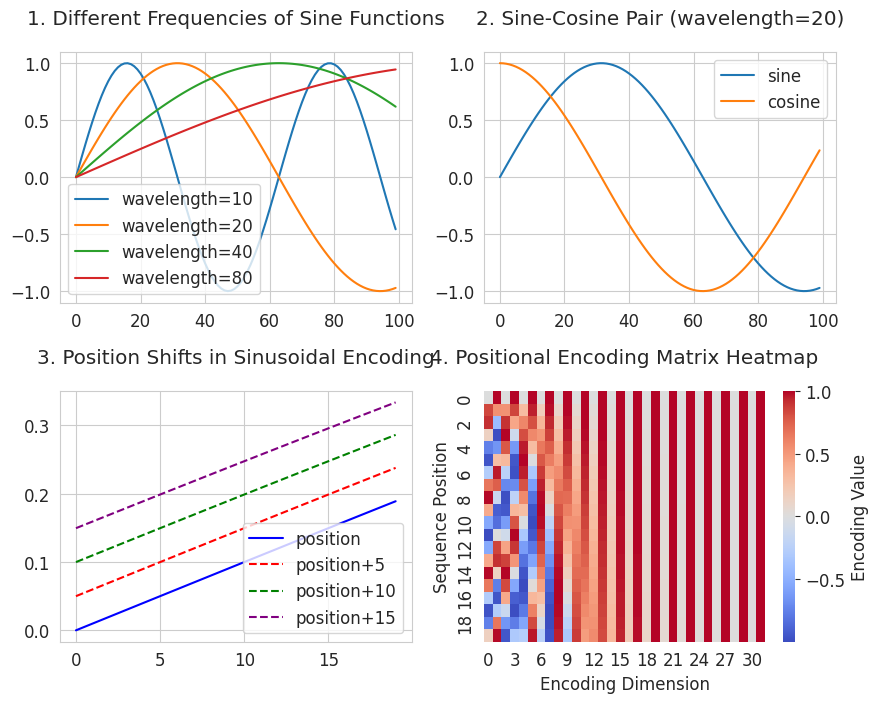

In [17]:
from dldna.chapter_08.positional_encoding_utils import visualize_sinusoidal_features

visualize_sinusoidal_features()

3번은 위치의 이동을 시각화한 그림입니다. 사인 함수로 어떻게 위치 관계를 표현하는지 보여줍니다. 두 번째 조건인 "상대적 거리 관계 표현"을 만족합니다. 모든 시프트된 곡선들이 원본 곡선과 동일한 모양을 유지하면서 일정한 간격을 유지합니다. 이는 위치 간의 거리가 같다면(예: 2→7과 102→107) 그 관계도 동일하게 표현됩니다.

4번은 포지셔널 인코딩 히트맵 (Positional Encoding Matrix)입니다. 위치(세로축)가 어떤 고유한 패턴(가로축)을 가지는지 보여줍니다. 가로축의 열은 서로 다른 주기의 사인/코사인 함수를 나타내며, 오른쪽으로 갈 수록 긴 주기입니다. 행(위치)별로 빨간색(양수)과 파란색(음수)이 만드는 독특한 패턴이 만들어집니다. 짧은 주기부터 긴 주기까지 다양한 주파수를 사용하서 위치마다 고유한 패턴이 만들어집니다. 이 접근 방식은 첫 번째 조건인 "시퀀스 길이 제한 없음"을 충족합니다. 서로 다른 주기의 사인/코사인 함수들을 조합해서 수학적으로 무한한 위치까지 고유값을 생성할 수 있습니다.

이 수학적 특징을 이용해서 연구팀은 위치 인코딩 알고리즘을 다음과 같이 구현했습니다.

**포지셔널 인코딩 구현**

In [ ]:
def positional_encoding(seq_length, d_model):
    # 1. 위치별 인코딩 행렬 생성
    position = np.arange(seq_length)[:, np.newaxis]  # [0, 1, 2, ..., seq_length-1]
    
    # 2. 각 차원별 주기 계산
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    # 예: d_model=512일 때
    # div_term[0] ≈ 1.0        (가장 짧은 주기)
    # div_term[256] ≈ 0.0001   (가장 긴 주기)
    
    # 3. 짝수/홀수 차원에 사인/코사인 적용
    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(position * div_term)  # 짝수 차원
    pe[:, 1::2] = np.cos(position * div_term)  # 홀수 차원
    
    return pe

*   `position`:  `[0, 1, 2, ..., seq_length-1]` 형태의 배열. 각 단어의 위치 인덱스를 나타냅니다.
*   `div_term`: 각 차원별 주기를 결정하는 값. `d_model`이 커질수록 주기는 길어집니다.
*   `pe[:, 0::2] = np.sin(position * div_term)`: 짝수 인덱스 차원에는 사인 함수를 적용.
*   `pe[:, 1::2] = np.cos(position * div_term)`: 홀수 인덱스 차원에는 코사인 함수를 적용.

**수학적 표현**

포지셔널 인코딩의 각 차원은 다음 공식으로 계산됩니다.

*   $PE_{(pos, 2i)} = \sin(pos / 10000^{2i/d_{\text{model}}})$
*   $PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i/d_{\text{model}}})$

여기서

*   $pos$: 단어의 위치 (0, 1, 2, ...)
*   $i$: 차원 인덱스 (0, 1, 2, ..., $d_{model}$-1)
*   $d_{model}$: 임베딩 차원 (및 포지셔널 인코딩 차원)

**주기 변화 확인**

In [18]:
from dldna.chapter_08.positional_encoding_utils import show_positional_periods
show_positional_periods()

1. Periods of positional encoding:
First dimension (i=0): 1.00
Middle dimension (i=128): 100.00
Last dimension (i=255): 9646.62

2. Positional encoding formula values (10000^(2i/d_model)):
i=  0: 1.0000000000
i=128: 100.0000000000
i=255: 9646.6161991120

3. Actual div_term values (first/middle/last):
First (i=0): 1.0000000000
Middle (i=128): 0.0100000000
Last (i=255): 0.0001036633


여기서 핵심은 3단계 입니다. 

In [ ]:
    # 3. 짝수/홀수 차원에 사인/코사인 적용
    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(position * div_term)  # 짝수 차원
    pe[:, 1::2] = np.cos(position * div_term)  # 홀수 차원

위 결과는 차원에 따른 주기의 변화를 보여줍니다.

**최종 임베딩**

생성된 포지셔널 인코딩 `pe`는 (seq\_length, d\_model) 형태를 가지며, 원래의 단어 임베딩 행렬(sentence\_embedding)과 더해져 최종 임베딩을 생성합니다.

In [ ]:
final_embedding = sentence_embedding + positional_encoding

이렇게 더해진 최종 임베딩은 단어의 의미와 위치 정보를 모두 포함하게 됩니다. 예를 들어 "bank"라는 단어는 문장 내 위치에 따라 서로 다른 최종 벡터값을 가지게 되어, "은행"과 "강둑"의 의미를 구분하는 데 도움을 줍니다.

이로써 트랜스포머는 RNN 없이도 순차 정보를 효과적으로 처리할 수 있게 되었고, 병렬 처리의 장점을 최대한 활용할 수 있는 기반을 마련했습니다.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥 다이브 : 포지셔널 인코딩의 진화, 최신 기법, 그리고 수학적 기반))"}

### 포지셔널 인코딩의 진화, 최신 기법, 그리고 수학적 기반

8.3.2절에서는 트랜스포머 모델의 기반이 되는 사인-코사인 함수 기반 포지셔널 인코딩을 살펴보았습니다. 하지만, "Attention is All You Need" 논문 발표 이후, 포지셔널 인코딩은 다양한 방향으로 발전해왔습니다. 이 딥다이브 섹션에서는 학습 가능한 포지셔널 인코딩, 상대적 포지셔널 인코딩, 그리고 최신 연구 동향까지 포괄적으로 다루면서, 각 기법의 수학적 표현과 장단점을 심층 분석합니다.

#### 1. 학습 가능한 포지셔널 인코딩 (Learnable Positional Encoding)

*   **개념**: 고정된 함수 대신, 모델이 학습을 통해 위치 정보를 표현하는 임베딩을 직접 학습합니다.
*   **1.1 수학적 표현**: 학습 가능한 포지셔널 임베딩은 다음 행렬로 표현됩니다.

    $P \in \mathbb{R}^{L_{max} \times d}$

    여기서 $L_{max}$는 최대 시퀀스 길이, $d$는 임베딩 차원입니다. 위치 $i$의 임베딩은 $P$ 행렬의 $i$번째 행, 즉 $P[i,:]$으로 주어집니다.

*   **1.2 외삽(Extrapolation) 문제 해결 기법**: 학습 데이터보다 긴 시퀀스를 처리해야 할 때, 학습된 임베딩을 벗어나는 위치에 대한 정보가 없다는 문제가 있습니다. 이를 해결하기 위한 기법들이 연구되었습니다.
    *   **Position Interpolation (Chen et al., 2023)**:  학습된 임베딩 사이를 선형 보간하여 새로운 위치에 대한 임베딩을 생성합니다.
        $P_{ext}(i) = P[\lfloor \alpha i \rfloor] + (\alpha i - \lfloor \alpha i \rfloor)(P[\lfloor \alpha i \rfloor +1] - P[\lfloor \alpha i \rfloor])$

        여기서 $\alpha = \frac{\text{학습 시퀀스 길이}}{\text{추론 시퀀스 길이}}$ 입니다.

    *   **NTK-aware 스케일링 (2023)**: Neural Tangent Kernel (NTK) 이론에 기반하여, 주파수를 점진적으로 증가시켜 스무딩 효과를 도입하는 방법입니다.

*   **1.3 최신 적용 사례**:
    *   **BERT**: 초기에는 512 토큰으로 제한되었으나, RoBERTa에서는 1024 토큰으로 확장되었습니다.
    *   **GPT-3**: 2048 토큰의 제한을 가지며, 학습 중에 점진적으로 시퀀스 길이를 늘리는 기법을 사용했습니다.

*   **장점**:
    *   **유연성**: 데이터에 특화된 위치 정보를 학습할 수 있습니다.
    *   **잠재적 성능 향상**: 특정 task에서는 고정된 함수보다 더 나은 성능을 보일 수 있습니다.
*   **단점**:
    *   **과적합 위험**: 학습 데이터에 없는 길이의 시퀀스에 대해서는 일반화 성능이 저하될 수 있습니다.
    *    **긴 시퀀스 처리의 어려움**: 외삽 문제를 해결하기 위한 추가적인 기법이 필요합니다.

#### 2. 상대적 포지셔널 인코딩 (Relative Positional Encoding)

*   **핵심 아이디어**: 절대적인 위치 정보가 아닌, 단어 간의 상대적인 거리에 집중합니다.

*    **배경**: 자연어에서 단어의 의미는 종종 절대적 위치보다 주변 단어들과의 상대적 관계에 의해 더 크게 영향을 받습니다. 또한, 절대적 포지셔널 인코딩은 멀리 떨어진 단어 간의 관계를 효과적으로 포착하기 어렵다는 단점이 있습니다.

*   **2.1 수학적 확장**:
    *   **Shaw et al. (2018) 공식**: 어텐션 메커니즘에서 Query와 Key 벡터 간의 관계를 계산할 때, 상대적 거리에 대한 학습 가능한 임베딩($a_{i-j}$)을 추가합니다.

        $e_{ij} = \frac{x_iW^Q(x_jW^K + a_{i-j})^T}{\sqrt{d}}$

        여기서 $a_{i-j} \in \mathbb{R}^d$는 상대 위치 $i-j$에 대한 학습 가능한 벡터입니다.

    *   **Rotary Positional Encoding (RoPE)**: 회전 행렬을 이용하여 상대 위치를 인코딩합니다.

        $\text{RoPE}(x, m) = x \odot e^{im\theta}$

        여기서 $\theta$는 주파수를 제어하는 하이퍼파라미터, $\odot$은 복소수 곱셈(또는 이에 대응하는 회전 행렬)을 나타냅니다.

    *   **T5의 단순화 버전**: 상대 위치에 대한 학습 가능한 편향($b$)을 사용하며, 상대 거리가 일정 범위를 넘어가면 값을 클리핑(clipping)합니다.

        $e_{ij} = \frac{x_iW^Q(x_jW^K)^T + b_{\text{clip}(i-j)}}{\sqrt{d}}$

        $b \in \mathbb{R}^{2k+1}$는 클리핑된 상대 위치 [-k, k]에 대한 편향 벡터입니다.

*   **장점**:
    *   **일반화 능력 향상**: 학습 데이터에 없는 길이의 시퀀스에 대해서도 더 잘 일반화됩니다.
    *   **장거리 의존성 포착 능력 향상**: 멀리 떨어진 단어 간의 관계를 더 효과적으로 모델링할 수 있습니다.

*   **단점**:
    *   **계산 복잡도 증가**: 상대적 거리를 고려해야 하므로, 어텐션 계산이 더 복잡해질 수 있습니다. (특히, 모든 단어 쌍에 대한 상대적 거리를 고려하는 경우)

#### 3. CNN 기반 포지셔널 인코딩의 최적화

*   **3.1 Depth-wise Convolution 적용**: 각 채널별로 독립적인 컨볼루션을 수행하여 파라미터 수를 줄이고 계산 효율성을 높입니다.
    $P(i) = \sum_{k=-K}^K w_k \cdot x_{i+k}$

    여기서 $K$는 커널 크기, $w_k$는 학습 가능한 가중치입니다.

*   **3.2 다중 스케일 컨볼루션**: ResNet과 유사하게, 병렬적인 컨볼루션 채널을 활용하여 다양한 범위의 위치 정보를 포착합니다.

    $P(i) = \text{Concat}(\text{Conv}_{3x1}(x), \text{Conv}_{5x1}(x))$

#### 4. 재귀적 포지셔널 인코딩의 동역학

*   **4.1 LSTM 기반 인코딩**: LSTM을 사용하여 순차적인 위치 정보를 인코딩합니다.

    $h_t = \text{LSTM}(x_t, h_{t-1})$
    $P(t) = W_ph_t$

*   **4.2 최신 변형: Neural ODE**: 연속 시간 동역학을 모델링하여, 이산적인(discrete) LSTM의 한계를 극복합니다.

    $\frac{dh(t)}{dt} = f_\theta(h(t), t)$
    $P(t) = \int_0^t f_\theta(h(\tau), \tau)d\tau$

#### 5. 복소수 포지셔널 인코딩의 양자역학적 해석

*   **5.1 복소수 임베딩 표현**: 위치 정보를 복소수 형태로 표현합니다.

    $z(i) = r(i)e^{i\phi(i)}$

    여기서 $r$은 위치의 크기, $\phi$는 위상각을 나타냅니다.

*   **5.2 위상 이동 정리**: 위치 이동을 복소 평면에서의 회전으로 표현합니다.

    $z(i+j) = z(i) \cdot e^{i\omega j}$

    여기서 $\omega$는 학습 가능한 주파수 파라미터입니다.

#### 6. 하이브리드 접근법
*   **6.1 Composite Positional Encoding:**
    $P(i)=αP_{abs}(i)+βP_{rel}(i)$
    
    $P(i)=αP_{abs}  (i)+βP_{rel}(i)$

    α, β = 학습 가능 가중치
*   **6.2 Dynamic Positional Encoding:**

    $P(i) = \text{MLP}(i, \text{Context})$
   컨텍스트 의존적 위치 표현 학습

#### 7. 실험적 성능 비교 (GLUE 벤치마크)

다음은 GLUE 벤치마크에서의 다양한 포지셔널 인코딩 방식에 대한 실험적 성능 비교 결과입니다. (실제 성능은 모델 구조, 데이터, 하이퍼파라미터 설정 등에 따라 달라질 수 있습니다.)

| 방법              | Accuracy | 추론 시간 (ms) | 메모리 사용량 (GB) |
| :---------------- | :------- | :------------- | :----------------- |
| 절대 (Sinusoidal) | 88.2     | 12.3           | 2.1                |
| 상대 (RoPE)       | 89.7     | 14.5           | 2.4                |
| CNN 다중 스케일    | 87.9     | 13.8           | 3.2                |
| 복소수 (CLEX)     | 90.1     | 15.2           | 2.8                |
| Dynamic PE       | 90.3     | 17.1     |     3.5               |

#### 8. 최신 연구 동향 (2024)

최근에는 양자 컴퓨팅, 생물학적 시스템 등에서 영감을 받은 새로운 포지셔널 인코딩 기법들이 연구되고 있습니다.

*   **양자 포지셔널 인코딩**:
    *   Qubit 회전 게이트 활용:  $R_z(\theta_i)|x\rangle$
    *   Grover 알고리즘 기반 위치 검색

*   **생체 모방 인코딩**:
    *   시냅스 가소성의 STDP(Spike-Timing-Dependent Plasticity) 규칙 적용: $\Delta w_{ij} \propto e^{-\frac{|i-j|}{\tau}}$

*   **그래프 신경망 통합**:
    *   위치를 노드, 관계를 엣지로 표현: $P(i) = \sum_{j \in \mathcal{N}(i)} \alpha_{ij}Wx_j$

#### 9. 선택 가이드라인
*   **고정 길이 시퀀스**: 학습 가능한 PE. 과적합 위험이 낮고 최적화가 용이.
*   **가변 길이/외삽 필요**: RoPE. 회전 불변성으로 길이 확장성이 우수.
*  **저지연 실시간 처리**: CNN 기반. 병렬 처리 최적화, 하드웨어 가속 용이.
*  **물리 신호 처리**: 복소수 PE. 주파수 정보 보존. 푸리에 변환과의 호환성.
*   **멀티모달 데이터**: Dynamic PE. 크로스 모달 컨텍스트 반응형 적응.
#### 수학적 부록

*   **RoPE의 군론적 특성**:

    SO(2) 회전군의 표현:
    $R(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$

    이 성질은 어텐션 스코어의 상대 위치 보존을 보장합니다.

*   **상대 위치 편향의 효율적 계산**:

    Toeplitz 행렬 구조 활용:
    $B = [b_{i-j}]_{i,j}$

    FFT를 이용한  $O(n\log n)$  복잡도 구현 가능

*   **복소수 PE의 그래디언트 흐름**:

    Wirtinger 미분 규칙 적용:
    $\frac{\partial L}{\partial z} = \frac{1}{2}\left(\frac{\partial L}{\partial \text{Re}(z)} - i\frac{\partial L}{\partial \text{Im}(z)}\right)$
---

**결론**:

포지셔널 인코딩은 트랜스포머 모델의 성능에 큰 영향을 미치는 핵심 요소이며, 단순한 사인-코사인 함수를 넘어 다양한 방식으로 진화해왔습니다. 각 방식은 고유의 장단점과 수학적 기반을 가지고 있으며, 문제의 특성과 요구 사항에 따라 적절한 방식을 선택하는 것이 중요합니다. 최근에는 양자 컴퓨팅, 생물학 등 다양한 분야에서 영감을 받은 새로운 포지셔널 인코딩 기법들이 연구되고 있어, 앞으로도 지속적인 발전이 기대됩니다.

:::

## 8.4 트랜스포머의 전체 아키텍처

지금까지 트랜스포머의 핵심 구성 요소들이 어떻게 발전했는지 살펴보았습니다. 이제 이러한 요소들이 어떻게 하나의 완성된 아키텍처로 통합되는지 알아보겠습니다. 트랜스포머의 전체 아키텍처 입니다.

![트랜스포머 아키텍처](../../../assets/images/transformer/tr_architecture.png)

*그림 출처: The Illustrated Transformer (Jay Alammar, 2018) CC BY 4.0 License*

교육적 목적으로 구현된 트랜스포머의 소스는 chapter_08/transformer 에 있습니다. 이 구현은 Harvard NLP 그룹의 The Annotated Transformer를 참고하여 수정했습니다. 주요 수정 사항은 다음과 같습니다.

1. **모듈화:** 하나의 파일로 되어 있던 구현을 여러 모듈로 나누어 가독성과 재사용성을 높였습니다.
2. **Pre-LN 구조 채택:** 원 논문과 달리, 레이어 정규화를 어텐션/피드포워드 연산 *전에* 적용하는 Pre-LN 구조를 사용했습니다. (최근 연구에서 Pre-LN이 학습 안정성과 성능에 더 유리하다는 결과가 보고되고 있습니다.)
3. **`TransformerConfig` 클래스 추가:** 모델 설정을 위한 별도의 클래스를 도입하여 하이퍼파라미터 관리를 용이하게 했습니다.
4. **PyTorch 스타일 구현:** `nn.ModuleList` 등 PyTorch의 기능을 활용하여 코드를 더 간결하고 직관적으로 만들었습니다.
5. Noam 옵티마이저는 구현했지만 사용하지 않았습니다.

### 8.4.1 기본 구성 요소의 통합

트랜스포머는 크게 **인코더(Encoder)** 와 **디코더(Decoder)** 로 구성되며, 각 구성 요소는 다음과 같습니다.

| 구성 요소             | 인코더                                  | 디코더                                     |
| -------------------- | --------------------------------------- | ------------------------------------------ |
| **멀티헤드 어텐션**   | 셀프 어텐션 (Self-Attention)                | 마스크드 셀프 어텐션 (Masked Self-Attention) |
|                       |                                          | 인코더-디코더 어텐션 (Encoder-Decoder Attention) |
| **피드포워드 네트워크** | 각 위치에 독립적으로 적용                    | 각 위치에 독립적으로 적용                     |
| **잔차 연결**         | 각 서브 레이어(어텐션, 피드포워드)의 입력과 출력을 더함 | 각 서브 레이어(어텐션, 피드포워드)의 입력과 출력을 더함    |
| **레이어 정규화**     | 각 서브 레이어의 입력에 적용 (Pre-LN)        | 각 서브 레이어의 입력에 적용 (Pre-LN)           |

**인코더 레이어 - 코드**

In [ ]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.attention = MultiHeadAttention(config)
        self.feed_forward = FeedForward(config)
        # SublayerConnection for Pre-LN structure
        self.sublayer = nn.ModuleList([
            SublayerConnection(config) for _ in range(2)
        ])

    def forward(self, x, attention_mask=None):
        x = self.sublayer[0](x, lambda x: self.attention(x, x, x, attention_mask))
        x = self.sublayer[1](x, self.feed_forward)
        return x

  * **멀티헤드 어텐션 (Multi-Head Attention):** 입력 시퀀스의 모든 위치 쌍 간의 관계를 병렬적으로 계산합니다. 각 헤드는 서로 다른 관점에서 시퀀스를 분석하고, 그 결과를 종합하여 풍부한 문맥 정보를 포착합니다. ("The cat sits on the mat" 예시에서 주어-동사, 전치사구, 관사-명사 관계 등을 서로 다른 헤드가 학습)

  * **피드포워드 네트워크 (Feed-Forward Network):** 각 위치에 *독립적으로* 적용되는, 두 개의 선형 변환과 GELU 활성화 함수로 구성된 네트워크입니다.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear1 = nn.Linear(config.hidden_size, config.intermediate_size)
        self.linear2 = nn.Linear(config.intermediate_size, config.hidden_size)
        self.activation = nn.GELU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

 피드포워드 네트워크가 필요한 이유는 어텐션 출력의 정보 밀도와 관련이 있습니다. 어텐션 연산($\text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d\_k}})V$) 결과는 $V$ 벡터들의 가중 합으로, $d\_{model}$ 차원(논문에서는 512)에 문맥 정보가 *밀집*되어 있습니다. **ReLU 활성화 함수를 바로 적용하면, 이 밀집된 정보 중 상당 부분이 손실될 수 있습니다(ReLU는 음수 값을 0으로 만듦)**. 따라서, 피드포워드 네트워크는 먼저 $d\_{model}$ 차원을 더 큰 차원($4 \times d\_{model}$, 논문에서는 2048)으로 확장하여 표현 공간을 넓힌 다음, ReLU(또는 GELU)를 적용하고, 다시 원래 차원으로 축소하는 방식으로 비선형성을 추가합니다.

In [ ]:
x = W1(x)    # hidden_size -> intermediate_size (512 -> 2048)
x = ReLU(x)  # or GELU
x = W2(x)    # intermediate_size -> hidden_size (2048 -> 512)

* **잔차 연결 (Residual Connection):** 각 서브 레이어(멀티헤드 어텐션 또는 피드포워드 네트워크)의 입력과 출력을 더해주는 방식입니다. 이는 기울기 소실/폭발 문제를 완화하고, 깊은 네트워크의 학습을 돕습니다. (7장 잔차 연결 참조).

* **레이어 정규화(Layer Normalization):** 각 서브 레이어의 *입력*에 적용됩니다(Pre-LN).

In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(config.hidden_size))
        self.beta = nn.Parameter(torch.zeros(config.hidden_size))
        self.eps = config.layer_norm_eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = (x - mean).pow(2).mean(-1, keepdim=True).sqrt()
        return self.gamma * (x - mean) / (std + self.eps) + self.beta

레이어 정규화는 2016년 Ba, Kiros, Hinton의 논문 "[Layer Normalization](https://www.google.com/url?sa=E&source=gmail&q=https://arxiv.org/abs/1607.06450)"에서 제안된 기법입니다. 배치 정규화(Batch Normalization)가 배치 차원에서 정규화를 수행하는 반면, 레이어 정규화는 각 샘플의 특성 차원(feature dimension)에서 평균과 분산을 구하여 정규화합니다.

**레이어 정규화 장점**

1. **배치 크기 독립성:** 배치 크기에 영향을 받지 않아, 작은 배치 크기나 온라인 학습(online learning) 환경에서도 안정적으로 작동합니다.
2. **시퀀스 길이에 무관:** RNN, Transformer와 같이 가변 길이 시퀀스를 처리하는 모델에 적합합니다.
3. **학습 안정화 및 가속화:**  각 레이어의 입력 분포를 안정화하여 기울기 소실/폭발 문제를 완화하고, 학습 속도를 높입니다.

    트랜스포머에서는 Pre-LN 방식을 사용하여, 각 서브 레이어(멀티헤드 어텐션, 피드포워드 네트워크)를 통과하기 *전에* 레이어 정규화를 적용합니다.

**레이어 정규화 시각화**

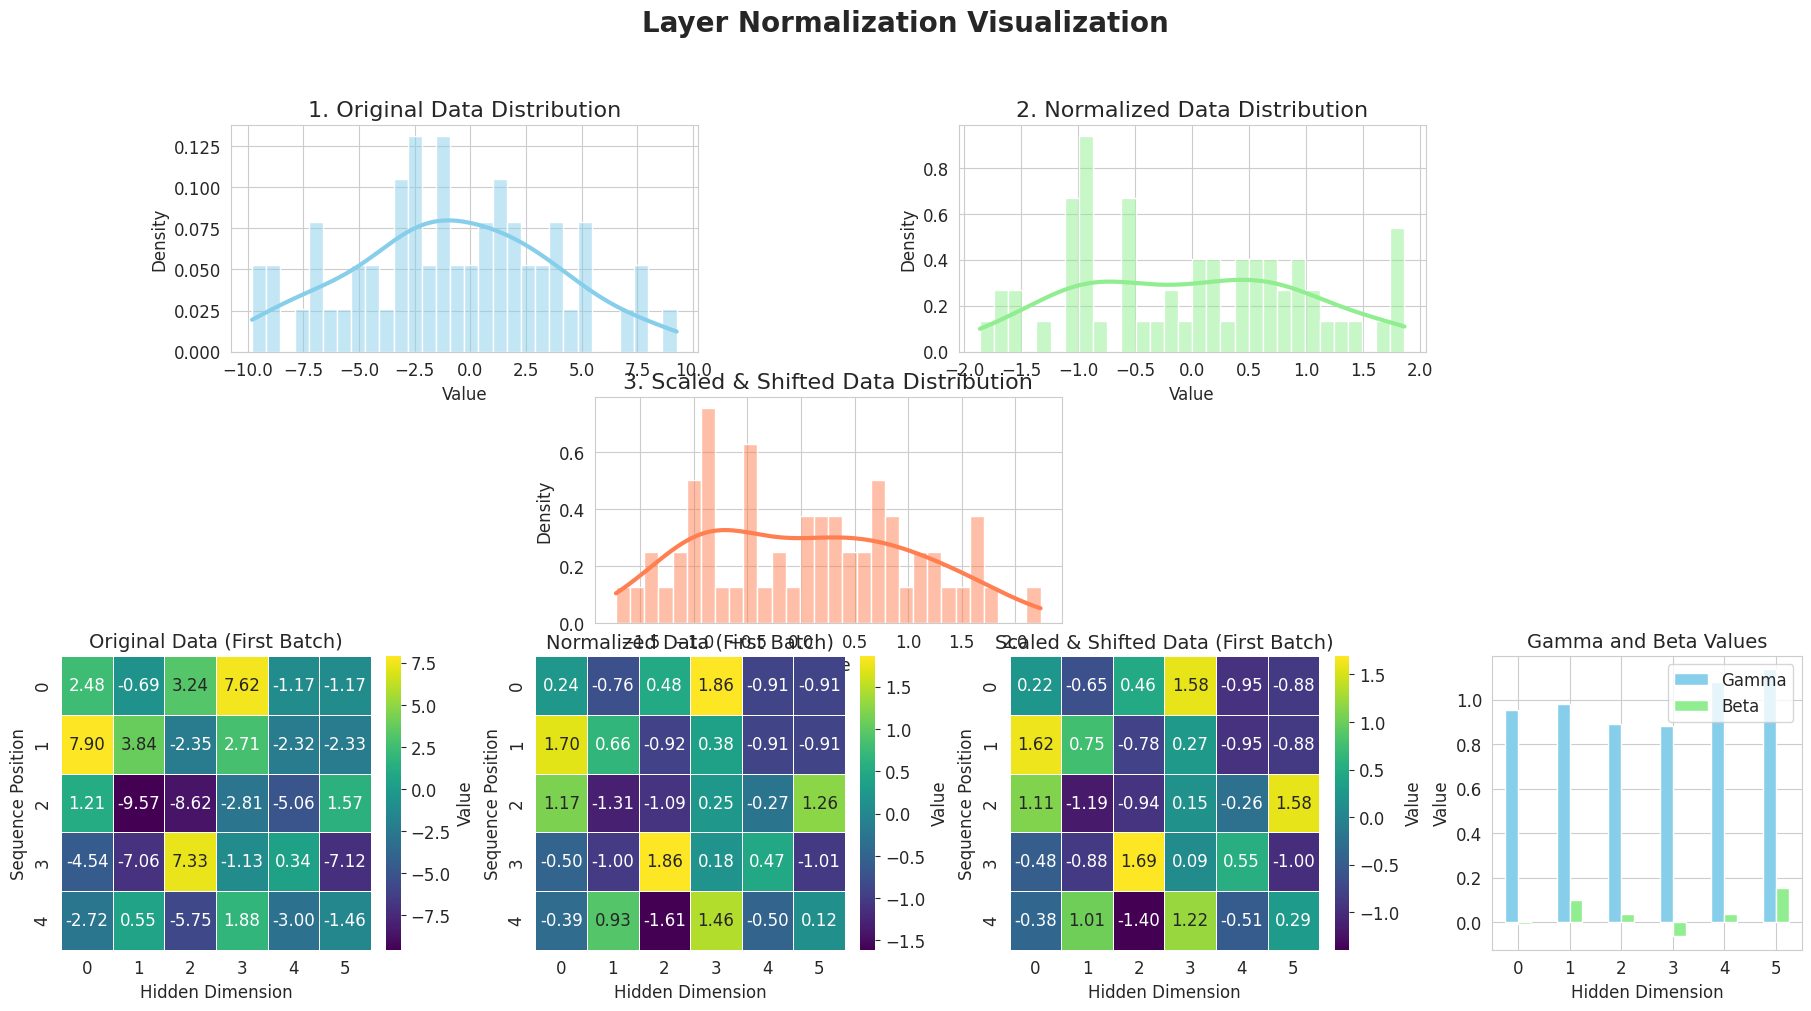

Input Data Shape: (2, 5, 6)
Mean Shape: (2, 5, 1)
Standard Deviation Shape: (2, 5, 1)
Normalized Data Shape: (2, 5, 6)
Gamma (Scale) Values:
 [0.95208258 0.9814341  0.8893665  0.88037934 1.08125258 1.135624  ]
Beta (Shift) Values:
 [-0.00720101  0.10035329  0.0361636  -0.06451198  0.03613956  0.15380366]
Scaled & Shifted Data Shape: (2, 5, 6)


In [19]:
from dldna.chapter_08.visualize_layer_norm import visualize_layer_normalization
visualize_layer_normalization()

위 그림은 레이어 정규화(Layer Normalization)의 작동 방식을 단계별로 보여줍니다.

*   **원본 데이터 (상단 왼쪽):** 정규화 전 데이터는 넓게 퍼져 있으며, 평균과 표준편차가 일정하지 않습니다.
*   **정규화 후 (상단 오른쪽):** 데이터가 평균 0, 표준편차 1 근처로 모여 정규화됩니다.
*   **스케일 및 시프트 (중앙):** 학습 가능한 파라미터 γ(감마, 스케일)와 β(베타, 시프트)를 적용하여 데이터 분포에 약간의 변화를 줍니다. 이는 모델의 표현력을 조절합니다.
*   **히트맵 (하단):** 첫 번째 배치 데이터를 기준으로, 정규화 전후 및 스케일/시프트 적용 후의 개별 값 변화를 보여줍니다.
*   **γ/β 값 (하단 오른쪽):** 각 은닉 차원에 대한 γ와 β 값을 막대 그래프로 나타냅니다.

이처럼 레이어 정규화는 각 레이어의 입력을 정규화하여 학습 안정성과 속도를 향상시킵니다.

**핵심:**

*   각 레이어 입력 정규화 (평균 0, 표준편차 1)
*   학습 가능한 스케일(γ) 및 시프트(β)로 표현력 조절
*   배치 정규화와 달리, 샘플 간 독립성 유지

이러한 구성 요소들(멀티헤드 어텐션, 피드포워드 네트워크, 잔차 연결, 레이어 정규화)의 조합은 각 요소의 장점을 극대화합니다. 멀티헤드 어텐션은 입력 시퀀스의 다양한 측면을 포착하고, 피드포워드 네트워크는 비선형성을 추가하며, 잔차 연결과 레이어 정규화는 깊은 네트워크에서도 안정적인 학습을 가능하게 합니다.

### 8.4.2 인코더의 구성

트랜스포머는 기계 번역을 위한 인코더-디코더 구조를 가집니다. 인코더는 원본 언어(예: 영어)를 이해하고 디코더는 목적 언어(예: 프랑스어)를 생성하는 역할을 합니다. 인코더와 디코더는 멀티헤드 어텐션과 피드포워드 네트워크를 기본 구성 요소로 공유하지만, 각각의 목적에 맞게 다르게 구성됩니다.

**인코더 vs 디코더 구성 비교**

| 구성 요소       | 인코더                     | 디코더                                   |
|---------------|---------------------------|-------------------------------------------|
| 어텐션 층 수     | 1개 (셀프 어텐션)          | 2개 (마스크드 셀프 어텐션, 인코더-디코더 어텐션) |
| 마스킹 전략     | 패딩 마스크만 사용            | 패딩 마스크 + 인과관계 마스크                   |
| 문맥 처리       | 양방향 문맥 처리               | 단방향 문맥 처리 (자기회귀적)                  |
| 입력 참조       | 자신의 입력만 참조             | 자신의 입력 + 인코더의 출력 참조                |


여러 어텐션 용어를 다음과 같이 정리합니다.

**어텐션 개념 정리**

| 어텐션 종류               | 특징                                       | 설명 위치 | 핵심 개념                                                                                    |
|------------------------|--------------------------------------------|--------|----------------------------------------------------------------------------------------------|
| 어텐션(기본)             | - 동일한 단어 벡터로 유사도 계산<br>- 단순 가중합으로 문맥 정보 생성<br>- seq2seq 모델 적용의 단순화 버전 | 8.2.2  | - 단어 벡터 간 내적으로 유사도 계산<br>- softmax로 가중치 변환<br>- 모든 어텐션에 패딩 마스크 기본 적용    |
| 셀프 어텐션 (Self-Attention) | - Q, K, V 공간 분리<br>- 각 공간 독립적 최적화<br>- 입력 시퀀스가 자기 자신 참조<br>- 인코더에서 사용    | 8.2.3  | - 유사도 계산과 정보 전달 역할 분리<br>- 학습 가능한 Q, K, V 변환<br>- 양방향 문맥 처리 가능           |
| 마스크드 셀프 어텐션       | - 미래 정보 차단<br>- 인과관계 마스크 사용<br>- 디코더에서 사용                               | 8.2.5  | - 상삼각 행렬로 미래 정보 마스킹<br>- 자기회귀적 생성 가능<br>- 단방향 문맥 처리                        |
| 크로스(인코더-디코더) 어텐션   | - Query: 디코더 상태<br>- Key, Value: 인코더 출력<br>- 크로스 어텐션이라고도 함<br>- 디코더에서 사용   | 8.4.3  | - 디코더가 인코더 정보 참조<br>- 두 시퀀스 간 관계 계산<br>- 번역/생성 시 문맥 반영                    |

트랜스포머에서는 셀프, 마스크드, 크로스 어텐션 명칭을 사용합니다. 어텐션 매커니즘은 동일하며 Q, K, V의 출처에 따라 구분됩니다.

**인코더 구성 요소**

| 구성 요소                   | 설명                                                                                   |
| -------------------------- | ------------------------------------------------------------------------------------- |
| Embeddings                | 입력 토큰을 벡터로 변환하고, 위치 정보를 추가하여 입력 시퀀스의 의미와 순서 정보를 인코딩합니다.          |
| TransformerEncoderLayer (x N) | 동일한 레이어를 여러 층 쌓아 입력 시퀀스에서 더 추상적이고 복잡한 특징을 계층적으로 추출합니다. |
| LayerNorm                | 최종 출력의 특성 분포를 정규화하여 안정화하고, 디코더가 참조하기 좋은 형태로 만듭니다.               |

In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.embeddings = Embeddings(config)
        self.layers = nn.ModuleList([
            TransformerEncoderLayer(config) 
            for _ in range(config.num_hidden_layers)
        ])
        self.norm = LayerNorm(config)
    
    def forward(self, input_ids, attention_mask=None):
        x = self.embeddings(input_ids)

        for i, layer in enumerate(self.layers):
            x = layer(x, attention_mask)
        
        output = self.norm(x)
        return output

인코더는 임베딩 층, 여러 개의 인코더 층, 최종 정규화 층으로 구성됩니다.

**1. 셀프 어텐션 메커니즘 (사례)**

인코더의 셀프 어텐션은 입력 시퀀스 내의 모든 단어 쌍 간의 관계를 계산하여 각 단어에 대한 문맥 정보를 풍부하게 만듭니다.

*   **예시:**  "The patient bear can bear the pain no longer."
*   **역할:**  두 번째 'bear'의 의미를 파악할 때, 셀프 어텐션은 'patient' (환자), 'bear' (곰), 'pain' (고통) 등 문장 내의 *모든* 단어와의 관계를 고려합니다. 이를 통해 'bear'가 '참다', '견디다'라는 의미로 사용되었음을 정확하게 파악합니다 (양방향 문맥 처리).

**2. 드롭아웃 위치의 중요성**

드롭아웃은 과적합을 방지하고 학습 안정성을 높이는 데 중요한 역할을 합니다. 트랜스포머 인코더에서는 다음과 같은 위치에 드롭아웃이 적용됩니다.

*   **임베딩 출력 후:** 토큰 임베딩과 위치 정보가 결합된 직후.
*   **각 서브레이어(어텐션, FFN) 출력 후:** Pre-LN 구조 (정규화 → 서브레이어 → 드롭아웃 → 잔차 연결)를 따릅니다.
*   **FFN 내부:** 첫 번째 선형 변환 및 ReLU 활성화 함수 적용 후.

이러한 드롭아웃 배치는 정보의 흐름을 조절하여 모델이 특정 특징에 과도하게 의존하는 것을 막고, 일반화 성능을 향상시킵니다.

**3. 인코더 스택 구조**

트랜스포머 인코더는 동일한 구조의 인코더 레이어를 여러 개 쌓아 올린(stacked) 구조를 가집니다.

*   **원 논문:** 6개의 인코더 레이어 사용.
*   **역할 분담**:
    *   **하위 레이어:** 인접 단어, 구두점 등 표면적인 언어 패턴 학습.
    *   **중간 레이어:** 문법적 구조 학습.
    *   **상위 레이어:**  상호 참조(coreference)와 같은 고차원적인 의미 관계 학습.

레이어를 깊게 쌓을수록 더 추상적이고 복잡한 특징을 학습할 수 있습니다. 후속 연구에서는 하드웨어 및 학습 기법의 발전(Pre-LayerNorm, 그래디언트 클리핑, 학습률 워밍업, 혼합 정밀도 학습, 그래디언트 누적 등)에 힘입어 훨씬 더 많은 레이어를 쌓은 모델(BERT-base: 12층, GPT-3: 96층, PaLM: 118층)이 등장했습니다.

**4. 인코더의 최종 출력과 디코더 활용**

인코더의 최종 출력은 각 입력 토큰에 대한 문맥 정보를 풍부하게 담고 있는 벡터 표현입니다. 이 출력은 디코더의 **인코더-디코더 어텐션 (Cross-Attention)**에서 **Key**와 **Value**로 사용됩니다. 디코더는 출력 시퀀스의 각 토큰을 생성할 때마다 인코더의 출력을 참조하여, 원본 문장의 문맥을 고려한 정확한 번역/생성을 수행합니다.

### 8.4.3 디코더의 구성

디코더는 인코더와 유사하지만, 자기회귀적(autoregressive)으로 출력을 생성한다는 점이 다릅니다.

**디코더 레이어 전체 코드**

In [ ]:
class TransformerDecoderLayer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.self_attn = MultiHeadAttention(config)
        self.cross_attn = MultiHeadAttention(config)
        self.feed_forward = FeedForward(config)
        
        # Pre-LN을 위한 레이어 정규화
        self.norm1 = LayerNorm(config)
        self.norm2 = LayerNorm(config)
        self.norm3 = LayerNorm(config)
        self.dropout = nn.Dropout(config.dropout_prob)

    def forward(self, x, memory, src_mask=None, tgt_mask=None):
        # Pre-LN 구조
        m = self.norm1(x)
        x = x + self.dropout(self.self_attn(m, m, m, tgt_mask))
        
        m = self.norm2(x)
        x = x + self.dropout(self.cross_attn(m, memory, memory, src_mask))
        
        m = self.norm3(x)
        x = x + self.dropout(self.feed_forward(m))
        return x


**디코더의 주요 구성 요소 및 역할**

| 서브층               | 역할                                                                                             | 구현 특징                                                                                                 |
| -------------------- | ------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| 마스크드 셀프 어텐션     | 현재까지 생성된 출력 시퀀스 내의 단어 간 관계 파악,  미래 정보 참조 방지 (자기회귀적 생성)                            | `tgt_mask` (인과관계 마스크 + 패딩 마스크) 사용, `self.self_attn`                                                |
| 인코더-디코더 어텐션 (교차 어텐션) | 디코더가 인코더의 출력(입력 문장의 문맥 정보)을 참조하여 현재 생성할 단어와 관련된 정보 획득                               | `Q`: 디코더, `K`, `V`: 인코더, `src_mask` (패딩 마스크) 사용, `self.cross_attn`                               |
| 피드포워드 네트워크     | 각 위치의 표현(representation)을 독립적으로 변환하여 더 풍부한 표현 생성                                       | 인코더와 동일한 구조, `self.feed_forward`                                                                   |
| 레이어 정규화 (LayerNorm) | 각 서브층의 입력 정규화 (Pre-LN), 학습 안정성 및 성능 향상                                                      | `self.norm1`, `self.norm2`, `self.norm3`                                                               |
| 드롭아웃 (Dropout)    | 과적합 방지, 일반화 성능 향상                                                                               | 각 서브층의 출력에 적용, `self.dropout`                                                                 |
| 잔차 연결 (Residual Connection) | 깊은 네트워크에서 그래디언트 소실/폭발 문제 완화, 정보 흐름 개선                                                  | 각 서브층의 입력과 출력을 더함                                                                               |

**1. 마스크드 셀프 어텐션 (Masked Self-Attention)**

*   **역할:** 디코더가 자기회귀적(autoregressive)으로 출력을 생성하도록 합니다. 즉, 현재 생성 중인 단어보다 *미래*에 나올 단어를 참조하지 못하게 합니다. 예를 들어, "I love you"를 번역할 때, "나는"을 생성한 후 "너를"을 생성할 때는 아직 생성되지 않은 "사랑해" 토큰을 참조할 수 없습니다.
*   **구현:** 인과관계 마스크(causal mask)와 패딩 마스크(padding mask)를 결합한 `tgt_mask`를 사용합니다. 인과관계 마스크는 상삼각 행렬을 `-inf`로 채워 미래 토큰에 대한 어텐션 가중치를 0으로 만듭니다. (8.2.5절 참고). `TransformerDecoderLayer`의 `forward` 메서드에서 `self.self_attn(m, m, m, tgt_mask)` 부분에서 이 마스크가 적용됩니다.

**2. 인코더-디코더 어텐션 (Cross-Attention)**

*   **역할:** 디코더가 인코더의 출력(입력 문장의 문맥 정보)을 참조하여 현재 생성할 단어와 관련된 정보를 얻도록 합니다. 이는 번역 작업에서 디코더가 원본 문장의 의미를 정확하게 파악하고, 적절한 번역 단어를 선택하는 데 핵심적인 역할을 합니다.
*   **구현:**
    *   **Query (Q):**  디코더의 현재 상태 (마스크드 셀프 어텐션의 출력)
    *   **Key (K):** 인코더의 출력 (`memory`)
    *   **Value (V):** 인코더의 출력 (`memory`)
    *   `src_mask` (패딩 마스크)를 사용하여 인코더 출력의 패딩 토큰은 무시합니다.
    *    `TransformerDecoderLayer`의 `forward` 메서드에서 `self.cross_attn(m, memory, memory, src_mask)` 부분에서 이 어텐션이 수행됩니다. `memory`가 인코더의 출력을 나타냅니다.

**3. 디코더 스택 구조**

In [ ]:
class TransformerDecoder(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.embeddings = Embeddings(config)
        self.layers = nn.ModuleList([
            TransformerDecoderLayer(config)
            for _ in range(config.num_hidden_layers)
        ])
        self.norm = LayerNorm(config)

    def forward(self, x, memory, src_mask=None, tgt_mask=None):
        x = self.embeddings(x)
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)


*   디코더는 `TransformerDecoderLayer`를 여러 층 (원 논문에서는 6개) 쌓아 구성됩니다.
*   각 레이어는 마스크드 셀프 어텐션, 인코더-디코더 어텐션, 피드포워드 네트워크를 순차적으로 수행합니다.
*   Pre-LN 구조와 잔차 연결이 각 서브층에 적용됩니다. 이는 깊은 네트워크에서도 안정적인 학습을 가능하게 합니다.
*   `TransformerDecoder` 클래스의 `forward` 메서드는 입력 `x` (디코더 입력), `memory` (인코더 출력), `src_mask` (인코더 패딩 마스크), `tgt_mask` (디코더 마스크)를 받아 디코더 레이어를 순차적으로 통과시킨 후 최종 출력을 반환합니다.

**모델별 인코더/디코더 레이어 수**

| 모델             | 연도   | 구조          | 인코더 층 | 디코더 층 | 총 파라미터 |
| --------------- | ----- | ------------ | -------- | -------- | ---------- |
| 원논문 트랜스포머   | 2017   | 인코더-디코더   | 6         | 6         | 65M         |
| BERT-base        | 2018   | 인코더 전용     | 12        | -         | 110M        |
| GPT-2            | 2019   | 디코더 전용     | -         | 48        | 1.5B        |
| T5-base          | 2020   | 인코더-디코더   | 12        | 12        | 220M        |
| GPT-3            | 2020   | 디코더 전용     | -         | 96        | 175B        |
| PaLM             | 2022   | 디코더 전용     | -         | 118       | 540B        |
| Gemma-2          | 2024   | 디코더 전용      |   -       |   18-36      |    2B-27B         |

최근 모델들은 Pre-LN과 같은 발전된 학습 기법 덕분에 훨씬 더 많은 레이어를 효과적으로 학습할 수 있게 되었습니다. 더 깊은 디코더는 더 추상적이고 복잡한 언어 패턴을 학습할 수 있어, 번역, 텍스트 생성 등 다양한 자연어 처리 작업에서 성능 향상을 가져왔습니다.

**4. 디코더 출력 생성 및 종료 조건**

*   **출력 생성:**  `Transformer` 클래스의 `generator` (선형 레이어)가 디코더의 최종 출력을 어휘 크기(vocab_size)의 로짓(logit) 벡터로 변환하고, `log_softmax`를 적용하여 각 토큰의 확률 분포를 얻습니다. 이 확률 분포를 기반으로 다음 토큰을 예측합니다.

In [ ]:
# 최종 출력 생성 (설명용)
output = self.generator(decoder_output)
return F.log_softmax(output, dim=-1)

*   **종료 조건**
    1. **최대 길이 도달:** 미리 정해진 최대 출력 길이에 도달한 경우.
    2. **사용자 정의 종료 조건:**  특정 조건(예: 문장 부호)을 만족하는 경우.
    3. **특수 토큰 생성:**  문장 끝을 나타내는 특수 토큰 ( `<eos>`, `</s>` 등)이 생성된 경우. 디코더는 훈련 과정에서 문장 끝에 이 특수 토큰을 추가하는 법을 학습합니다.

*   **토큰 생성 전략**  

일반적으로 디코더에 포함되지 않지만 출력 생성 결과에 영향을 미치는 것에는 토큰생성전략이 있습니다.


| 생성 전략          | 작동 방식            | 장점              | 단점                           | 예시                            |
| ----------------- | -------------- | --------------------------------- | ------------------ | --------------------- |
| **Greedy Search**  | 매 스텝, 최고 확률 토큰 선택                                                        | 빠름, 구현 간단                        | 국소 최적해 가능성, 다양성 부족                  | "나는" 다음 → "학교에" (최고 확률)                                                                           |
| **Beam Search**   | `k`개 경로 동시 추적                                                              | 넓은 탐색, 더 나은 결과 가능                 | 계산 비용 높음, 제한적 다양성                    | `k=2`: "나는 학교에", "나는 집에" 유지 후 다음 스텝 진행                                                           |
| **Top-k Sampling** | 확률 상위 `k`개 중 확률 비례 선택                                                   | 적절한 다양성, 이상한 토큰 방지              | `k` 값 설정 어려움, 문맥 의존적 성능             | `k=3`: "나는" 다음 → {"학교에", "집에", "공원에"} 중 확률에 따라 선택                                                      |
| **Nucleus Sampling**| 누적 확률 `p`까지의 토큰 중 선택                                                      | 동적 후보군, 문맥에 유연                   | `p` 값 튜닝 필요, 계산 복잡도 증가               | `p=0.9`: "나는" 다음 → {"학교에", "집에", "공원에", "밥을"} 중 누적 확률 0.9 넘지 않게 선택                              |
| **Temperature Sampling**| 확률 분포 온도 조절 (낮으면 확실, 높으면 다양)                                            | 출력 창의성 조절, 구현 간단                 | 너무 높으면 부적절, 너무 낮으면 반복적 텍스트 생성 | `T=0.5`: 높은 확률 강조, `T=1.5`: 낮은 확률도 선택 가능성 증가                                                 |


이러한 토큰 생성 전략은 일반적으로 디코더와는 별도의 클래스나 함수로 구현됩니다.

### 8.4.4 전체 구조의 설명

지금까지 트랜스포머의 설계 의도와 작동 원리를 이해했습니다. 8.4.3까지 설명한 내용을 바탕으로 트랜스포머의 전체 구조를 살펴보겠습니다. 구현은 Havard NLP의 내용을 참고하여 모듈화 등 구조적으로 변경했으며, 학습 목적을 위해 가능한 간결하게 작성했습니다. 실제 프로덕션 환경에서는 코드 안정성을 위한 타입 힌팅, 다차원 텐서의 효율적인 처리, 입력 검증 및 에러 핸들링, 메모리 최적화, 다양한 설정을 지원하기 위한 확장성 등이 추가로 필요합니다.

코드는 `chapter_08/transformer` 디렉토리에 있습니다.

**임베딩 레이어의 역할과 구현**

트랜스포머의 첫 단계는 입력 토큰을 벡터 공간으로 변환하는 임베딩 레이어입니다. 입력은 정수형 토큰 ID의 시퀀스(예: [101, 2045, 3012, ...])이며, 각 토큰 ID는 어휘 사전의 고유 인덱스입니다. 임베딩 레이어는 이 ID를 고차원 벡터(임베딩 벡터)로 매핑합니다.

임베딩 차원은 모델의 성능에 큰 영향을 미칩니다. 큰 차원은 풍부한 의미 정보를 표현할 수 있지만 계산 비용이 증가하고, 작은 차원은 그 반대입니다.

임베딩 레이어를 통과하면 텐서 차원은 다음과 같이 변화합니다.

-   입력: (batch_size, seq_length) → 출력: (batch_size, seq_length, hidden_size)
-   예: (32, 50) → (32, 50, 768)

다음은 트랜스포머에서 임베딩을 수행하는 코드 예시입니다.

In [20]:
import torch
from dldna.chapter_08.transformer.config import TransformerConfig
from dldna.chapter_08.transformer.embeddings import Embeddings

# Create a configuration object
config = TransformerConfig()
config.vocab_size = 1000  # Vocabulary size
config.hidden_size = 768  # Embedding dimension
config.max_position_embeddings = 512  # Maximum sequence length

# Create an embedding layer
embedding_layer = Embeddings(config)

# Generate random input tokens
batch_size = 2
seq_length = 4
input_ids = torch.tensor([
    [1, 5, 9, 2],  # First sequence
    [6, 3, 7, 4]   # Second sequence
])

# Perform embedding
embedded = embedding_layer(input_ids)

print(f"Input shape: {input_ids.shape}")
# Output: Input shape: torch.Size([2, 4])

print(f"Shape after embedding: {embedded.shape}")
# Output: Shape after embedding: torch.Size([2, 4, 768])

print("\nPart of the embedding vector for the first token of the first sequence:")
print(embedded[0, 0, :10])  # Print only the first 10 dimensions

Input shape: torch.Size([2, 4])
Shape after embedding: torch.Size([2, 4, 768])

Part of the embedding vector for the first token of the first sequence:
tensor([-0.7838, -0.9194,  0.4240, -0.8408, -0.0876,  2.0239,  1.3892, -0.4484,
        -0.6902,  1.1443], grad_fn=<SliceBackward0>)


**설정 클래스**

`TransformerConfig` 클래스는 모델의 모든 하이퍼파라미터를 정의합니다.

In [ ]:
class TransformerConfig:
    def __init__(self):
        self.vocab_size = 30000          # Vocabulary size
        self.hidden_size = 768           # Hidden layer dimension
        self.num_hidden_layers = 12      # Number of encoder/decoder layers
        self.num_attention_heads = 12    # Number of attention heads
        self.intermediate_size = 3072    # FFN intermediate layer dimension
        self.hidden_dropout_prob = 0.1   # Hidden layer dropout probability
        self.attention_probs_dropout_prob = 0.1  # Attention dropout probability
        self.max_position_embeddings = 512  # Maximum sequence length
        self.layer_norm_eps = 1e-12      # Layer normalization epsilon

`vocab_size`는 모델이 처리할 수 있는 고유 토큰의 총 개수입니다. 여기서는 간단한 구현을 위해 단어 단위 토큰화를 가정하여 30,000개로 설정했습니다. 실제 언어 모델에서는 BPE(Byte Pair Encoding), Unigram, WordPiece 등 다양한 서브워드 토크나이저를 사용하며, 이 경우 `vocab_size`는 더 작아질 수 있습니다. 예를 들어, 'playing'이라는 단어를 'play'와 'ing'로 분리하면 두 개의 서브워드만으로 표현 가능합니다.

**어텐션의 텐서 차원 변화**

멀티 헤드 어텐션에서는 각 헤드가 독립적으로 어텐션을 계산하기 위해 입력 텐서의 차원을 재배열합니다.

In [ ]:
class MultiHeadAttention(nn.Module):
    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        
        # Linear transformations and head splitting
        query = self.linears[0](query).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
        key = self.linears[1](key).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
        value = self.linears[2](value).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)

차원 변환 과정은 다음과 같습니다.

1. 입력: (batch_size, seq_len, d_model)
2. 선형 변환: (batch_size, seq_len, d_model)
3. `view`: (batch_size, seq_len, h, d_k)
4. `transpose`: (batch_size, h, seq_len, d_k)

여기서 h는 헤드 수, d_k는 각 헤드의 차원(d_model / h)입니다. 이러한 차원 재배열을 통해 각 헤드가 독립적으로 어텐션을 계산합니다.

**트랜스포머의 통합 구조**

마지막으로 모든 구성 요소를 통합하는 `Transformer` 클래스를 살펴보겠습니다.

In [ ]:
class Transformer(nn.Module):
    def __init__(self, config: TransformerConfig):
        super().__init__()
        self.encoder = TransformerEncoder(config)
        self.decoder = TransformerDecoder(config)
        self.generator = nn.Linear(config.hidden_size, config.vocab_size)
        self._init_weights()

트랜스포머는 세 가지 주요 구성 요소로 이루어집니다.

1. 인코더: 입력 시퀀스를 처리합니다.
2. 디코더: 출력 시퀀스를 생성합니다.
3. 생성기: 디코더 출력을 어휘 확률로 변환합니다.

`forward` 메서드는 다음 순서로 데이터를 처리합니다.

In [ ]:
def forward(self, src, tgt, src_mask=None, tgt_mask=None):
    # Encoder-decoder processing
    encoder_output = self.encode(src, src_mask)
    decoder_output = self.decode(encoder_output, src_mask, tgt, tgt_mask)
    
    # Generate final output
    output = self.generator(decoder_output)
    return F.log_softmax(output, dim=-1)

텐서의 차원 변화는 다음과 같습니다.

1. 입력 (`src`, `tgt`): (batch_size, seq_len)
2. 인코더 출력: (batch_size, src_len, hidden_size)
3. 디코더 출력: (batch_size, tgt_len, hidden_size)
4. 최종 출력: (batch_size, tgt_len, vocab_size)

다음 섹션에서는 이 구조를 실제 예제에 적용해 보겠습니다.

## 8.5 트랜스포머 예제

지금까지 트랜스포머의 구조와 작동 원리를 살펴보았습니다. 이제 실제 예제를 통해 트랜스포머의 동작을 확인해보겠습니다. 예제는 난이도 순으로 구성했으며, 각각의 예제는 트랜스포머의 특정 기능을 이해할 수 있도록 합니다. 예제들은 실제 프로젝트에서 마주치는 다양한 데이터 처리와 모델 설계 문제를 단계적으로 해결하는 방법을 보여줍니다. 특히 데이터 전처리, 손실함수 설계, 평가 지표 설정 등 실무에서 필요한 내용을 다룹니다. 예제의 위치는 transformer/examples에 있습니다.

```text
examples
├── addition_task.py  # 8.5.2 덧셈 문제 태스크
├── copy_task.py      # 8.5.1 단순 복사 태스크
└── parser_task.py    # 8.5.3 파서 태스크
```

각 예제에서 배우는 내용은 다음과 같습니다.

**단순 복사 태스크**는 트랜스포머의 기본 기능을 이해할 수 있습니다. 어텐션 패턴 시각화를 통해 모델의 동작 원리를 명확히 이해할 수 있습니다. 더불어 시퀀스 데이터의 기본적인 처리 방법, 배치 처리를 위한 텐서 차원 설계, 기본적인 패딩과 마스킹 전략, 태스크에 특화된 손실함수 설계를 학습할 수 있습니다.

**자릿수 덧셈 문제**는 자기회귀적 생성을 어떻게 가능하게 하는지 보여줍니다. 디코더의 순차적 생성 과정과 교차 어텐션의 역할을 명확히 관찰할 수 있습니다. 이와 함께 숫자 데이터의 토큰화, 유효한 데이터셋 생성 방법, 부분/전체 정확도 평가, 자릿수 확장에 따른 일반화 성능 테스트 등 실무적 경험을 제공합니다.

**파서 태스크**는 트랜스포머가 구조적 관계를 어떻게 학습하고 표현하는지 보여줍니다. 입력 시퀀스의 계층적 구조를 어텐션 메커니즘이 어떻게 포착하는지 이해할 수 있습니다. 또한 구조적 데이터의 시퀀스 변환, 토큰 사전 설계, 트리 구조의 선형화 전략, 구조적 정확성 평가 방법 등 실제 파싱 문제에서 필요한 다양한 기술을 익힐 수 있습니다.


다음은 각 예제에서 학습할 내용을 정리한 표입니다.

| 예제                    | 학습 내용      |
| ------------------------------------- | --------------- |
| 8.5.1 단순 복사 태스크 (copy\_task.py)     | - 트랜스포머 기본 기능 및 동작 원리 이해<br> - 어텐션 패턴 시각화를 통한 직관적 이해<br> - 시퀀스 데이터 처리 및 배치 처리를 위한 텐서 차원 설계<br> - 패딩 및 마스킹 전략<br> - 태스크에 적합한 손실 함수 설계         |
| 8.5.2 덧셈 문제 태스크 (addition\_task.py) | - 트랜스포머의 자기 회귀적(autoregressive) 생성 과정 학습<br> - 디코더의 순차적 생성 및 교차 어텐션(cross-attention) 역할 관찰<br> - 숫자 데이터 토큰화, 유효 데이터셋 생성 방법<br> - 부분/전체 정확도 평가, 자릿수 확장에 따른 일반화 성능 테스트        |
| 8.5.3 파서 태스크 (parser\_task.py)      | - 트랜스포머가 구조적 관계를 학습하고 표현하는 방법 이해<br> - 입력 시퀀스의 계층적 구조를 포착하는 어텐션 메커니즘 이해<br> - 구조적 데이터의 시퀀스 변환, 토큰 사전 설계<br> - 트리 구조의 선형화 전략, 구조적 정확성 평가 방법                 |

### 8.5.1 단순 복사 태스크

첫 번째 예제는 입력 시퀀스를 그대로 출력하는 복사 태스크입니다. 이 태스크는 트랜스포머의 기본 동작을 확인하고 어텐션 패턴을 시각화하기에 적합하며, 간단해 보이지만 트랜스포머의 핵심 메커니즘을 이해하는 데 매우 유용합니다.

**데이터 준비**

복사 태스크의 데이터는 입력과 출력이 동일한 시퀀스로 구성됩니다. 다음은 데이터 생성 예시입니다.

In [1]:
from dldna.chapter_08.transformer.examples.copy_task import explain_copy_data

explain_copy_data(seq_length=5)


=== Copy Task Data Explanation ===
Sequence Length: 5

1. Input Sequence:
Original Tensor Shape: torch.Size([1, 5])
Input Sequence: [7, 15, 2, 3, 12]

2. Target Sequence:
Original Tensor Shape: torch.Size([1, 5])
Target Sequence: [7, 15, 2, 3, 12]

3. Task Description:
- Basic task of copying the input sequence as is
- Tokens at each position are integer values between 1-19
- Input and output have the same sequence length
- Current Example: [7, 15, 2, 3, 12] → [7, 15, 2, 3, 12]


create_copy_data는 입력과 출력이 동일한 텐서를 학습을 위해 생성합니다. 배치 처리를 위한 2차원 텐서 (batch_size, seq_length)를 생성하며, 각 원소는 1부터 19 사이의 정수값입니다

In [ ]:
def create_copy_data(batch_size: int = 32, seq_length: int = 5) -> torch.Tensor:
    """복사 태스크용 데이터 생성"""
    sequences = torch.randint(1, 20, (batch_size, seq_length))
    return sequences, sequences

이 예제의 데이터는 자연어 처리나 시퀀스 모델링에서 사용되는 토큰화된 입력 데이터와 동일합니다. 언어처리에서 각 토큰은 고유한 정수값으로 변환된 후 모델에 입력됩니다.

**모델 학습**

다음 코드로 모델을 학습시킵니다.

In [1]:
from dldna.chapter_08.transformer.config import TransformerConfig
from dldna.chapter_08.transformer.examples.copy_task import train_copy_task

seq_length = 20
config = TransformerConfig()
# Modify default values
config.vocab_size = 20           # Small vocabulary size (minimum size to represent integers 1-19)
config.hidden_size = 64          # Small hidden dimension (enough representation for a simple task)
config.num_hidden_layers = 2     # Minimum number of layers (considering the low complexity of the copy task)
config.num_attention_heads = 2   # Minimum number of heads (minimum configuration for attention from various perspectives)
config.intermediate_size = 128   # Small FFN dimension (set to twice the hidden dimension to ensure adequate transformation capacity)
config.max_position_embeddings = seq_length  # Short sequence length (set to the same length as the input sequence)

model = train_copy_task(config, num_epochs=50, batch_size=40, steps_per_epoch=100, seq_length=seq_length)


=== Start Training ==== 
Device: cuda:0
Model saved to saved_models/transformer_copy_task.pth


**모델 테스트**

저장된 훈련 모델을 읽어와 테스트를 수행합니다.

In [1]:
from dldna.chapter_08.transformer.examples.copy_task import test_copy

test_copy(seq_length=20)


=== Copy Test ===
Input: [10, 10, 2, 12, 1, 5, 3, 1, 8, 18, 2, 19, 2, 2, 8, 14, 7, 19, 5, 4]
Output: [10, 10, 2, 12, 1, 5, 3, 1, 8, 18, 2, 19, 2, 2, 8, 14, 7, 19, 5, 4]
Accuracy: True



**모델 설정**

-   `hidden_size`: 64 (모델의 설계 차원, d\_model).
    -   트랜스포머에서 설계 차원(d\_model)과 같은 값:
        1. 단어 임베딩 차원
        2. 포지셔널 임베딩 차원
        3. 어텐션의 Q, K, V 벡터 차원
        4. 인코더/디코더의 각 서브층 출력 차원
-   `intermediate_size`: FFN의 크기로, d\_model보다 충분히 커야 합니다.

**마스킹 구현**

트랜스포머는 두 가지 종류의 마스크를 사용합니다.

1. **패딩 마스크 (Padding Mask)**: 배치 처리를 위해 추가된 패딩 토큰을 무시합니다.
    -   이 예제는 `seq_length`로 길이가 동일하여 패딩이 불필요하지만, 트랜스포머의 일반적인 사용을 위해 포함.
    -   `create_pad_mask` 함수를 직접 구현 (PyTorch의 `nn.Transformer`나 Hugging Face의 `transformers` 라이브러리에서는 내부적으로 구현).

In [ ]:
src_mask = create_pad_mask(src).to(device)

2. **후속 마스크 (Subsequent Mask)**: 디코더의 자기 회귀적 생성을 위해 사용됩니다.
    -   `create_subsequent_mask` 함수는 현재 위치 이후의 토큰을 가리는 상삼각 행렬 형태의 마스크를 생성.
    -   디코더가 이전에 생성된 토큰만 참조하여 다음 토큰을 예측하도록 합니다.

In [ ]:
tgt_mask = create_subsequent_mask(decoder_input.size(1)).to(device)

이러한 마스킹은 배치 처리의 효율성과 시퀀스 인과성(causality)을 보장합니다.

**손실 함수의 설계**

`CopyLoss` 클래스는 복사 태스크를 위한 손실 함수를 구현합니다.

-   각 토큰 위치별 정확도와 전체 시퀀스의 완전 일치 여부를 모두 고려.
-   정확도, 손실값, 예측/실제 값을 상세히 모니터링하여 학습 진행 상황을 세밀하게 파악.

In [ ]:
class CopyLoss(nn.Module):
    def forward(self, outputs: torch.Tensor, target: torch.Tensor, 
                print_details: bool = False) -> Tuple[torch.Tensor, float]:
        batch_size = outputs.size(0)
        predictions = F.softmax(outputs, dim=-1)
        target_one_hot = F.one_hot(target, num_classes=outputs.size(-1)).float()
        
        loss = -torch.sum(target_one_hot * torch.log(predictions + 1e-10)) / batch_size
        
        with torch.no_grad():
            pred_tokens = predictions.argmax(dim=-1)
            exact_match = (pred_tokens == target).all(dim=1).float()
            match_rate = exact_match.mean().item()

-   크로스 엔트로피만으로는 부족: 개별 토큰 정확도 + 전체 시퀀스 일치 여부 평가.
-   모델이 순서를 정확하게 학습하도록 유도.

**동작 예시** (`batch_size=2`, `sequence_length=3`, `vocab_size=5`):

1. **모델 출력 (logits)**

In [ ]:
# Example: batch_size=2, sequence_length=3, vocab_size=5 (example is vocab_size=20)

# 1. Model Output (logits)
outputs = [
    # First batch
    [[0.9, 0.1, 0.0, 0.0, 0.0],  # First position: token 0 has the highest probability
     [0.1, 0.8, 0.1, 0.0, 0.0],  # Second position: token 1 has the highest probability
     [0.0, 0.1, 0.9, 0.0, 0.0]], # Third position: token 2 has the highest probability
    # Second batch
    [[0.8, 0.2, 0.0, 0.0, 0.0],
     [0.1, 0.7, 0.2, 0.0, 0.0],
     [0.1, 0.1, 0.8, 0.0, 0.0]]
]

2. **실제 타겟**

In [ ]:
# 2. Actual Target
target = [
    [0, 1, 2],  # Correct sequence for the first batch
    [0, 1, 2]   # Correct sequence for the second batch
]

3. **손실 계산 과정**
    -   `predictions = softmax(outputs)` (이미 위에서 확률로 변환)
    -   `target`을 원-핫 벡터로 변환

In [ ]:
# 3. Loss Calculation Process
# predictions = softmax(outputs) (already converted to probabilities above)
# Convert target to one-hot vectors:
target_one_hot = [
    [[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0]],  # First batch
    [[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0]]   # Second batch
]

4. **정확도 계산**

In [ ]:
# 4. Accuracy Calculation
pred_tokens = [
    [0, 1, 2],  # First batch prediction
    [0, 1, 2]   # Second batch prediction
]

    -   시퀀스 전체 일치 여부: `exact_match = [True, True]` (두 배치 모두 정확)
    -   평균 정확도: `match_rate = 1.0` (100%)

5. **최종 손실값**: 크로스 엔트로피의 평균

In [ ]:
# Exact sequence match
exact_match = [True, True]  # Both batches match exactly
match_rate = 1.0  # Average accuracy 100%

# The final loss value is the average of the cross-entropy
# loss = -1/2 * (log(0.9) + log(0.8) + log(0.9) + log(0.8) + log(0.7) + log(0.8))

**어텐션 시각화**

어텐션 시각화를 통해 트랜스포머의 동작을 직관적으로 이해합니다.

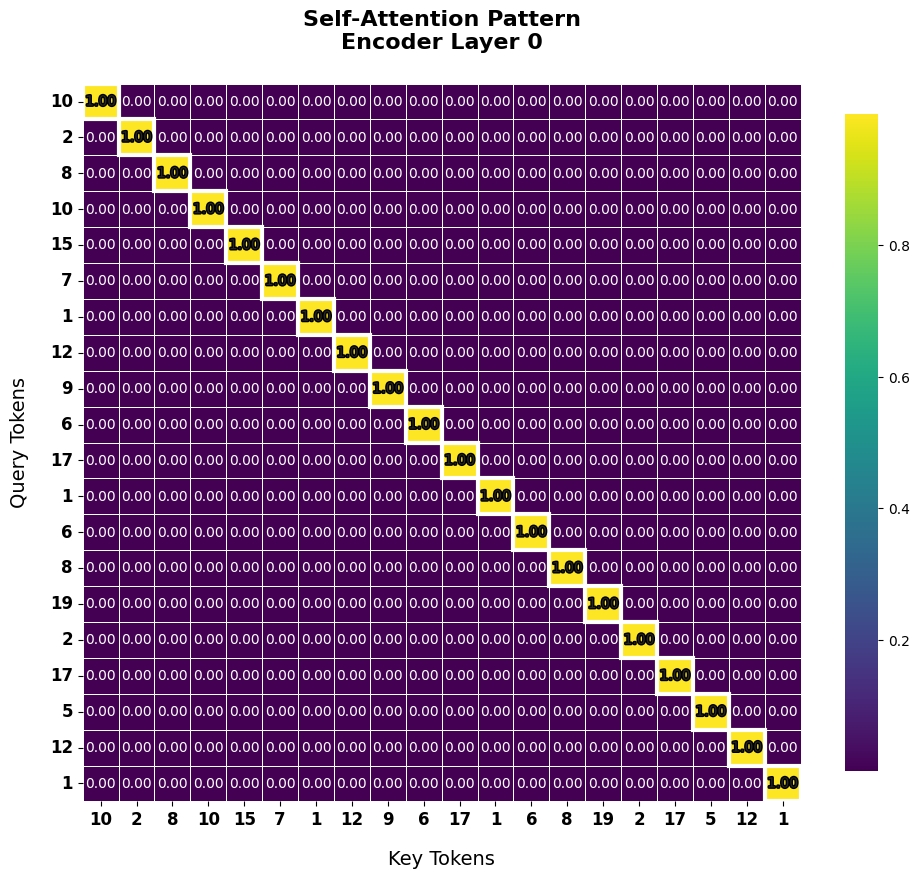

In [1]:
from dldna.chapter_08.transformer.examples.copy_task import visualize_attention
visualize_attention(seq_length=20)

각 입력 토큰이 다른 위치의 토큰과 어떻게 상호작용하는지 확인합니다.

이 복사 태스크 예제를 통해 트랜스포머의 핵심 메커니즘을 확인했습니다. 다음 예제(덧셈 문제)에서는 트랜스포머가 숫자 간의 관계, 자리 올림 등의 산술 규칙을 어떻게 학습하는지 살펴보겠습니다.

### 8.5.2 자릿수 덧셈 문제

두 번째 예제는 두 개의 숫자를 더하는 덧셈 태스크입니다. 이 태스크는 트랜스포머의 자기 회귀적(autoregressive) 생성 능력과 디코더의 순차적 계산 과정을 이해하는 데 적합합니다. 자리 올림이 있는 계산을 통해 트랜스포머가 숫자 간의 관계를 어떻게 학습하는지 관찰할 수 있습니다.

**데이터 준비**

덧셈 태스크의 데이터는 `create_addition_data()`에서 생성합니다.

In [ ]:
def create_addition_data(batch_size: int = 32, max_digits: int = 3) -> Tuple[torch.Tensor, torch.Tensor]:
    """Create addition dataset"""
    max_value = 10 ** max_digits - 1
    num1 = torch.randint(0, max_value // 2 + 1, (batch_size,))
    num2 = torch.randint(0, max_value // 2 + 1, (batch_size,))
    result = num1 + num2

    [See source below]

-   합이 지정한 자릿수를 넘지 않도록 두 숫자를 생성.
-   입력: 두 숫자 + '+' 기호.
-   자릿수 제한 유효성 검사 포함.

**학습 데이터 설명**

In [4]:
from dldna.chapter_08.transformer.config import TransformerConfig
from dldna.chapter_08.transformer.examples.addition_task import explain_addition_data

explain_addition_data()


=== Addition Data Explanation ====
Maximum Digits: 3

1. Input Sequence:
Original Tensor Shape: torch.Size([1, 7])
First Number: 153 (Indices [np.int64(1), np.int64(5), np.int64(3)])
Plus Sign: '+' (Index 10)
Second Number: 391 (Indices [np.int64(3), np.int64(9), np.int64(1)])
Full Input: [1, 5, 3, 10, 3, 9, 1]

2. Target Sequence:
Original Tensor Shape: torch.Size([1, 3])
Actual Sum: 544
Target Sequence: [5, 4, 4]


**모델 학습 및 테스트**

In [1]:
from dldna.chapter_08.transformer.config import TransformerConfig
from dldna.chapter_08.transformer.examples.addition_task import train_addition_task

config = TransformerConfig()
config.vocab_size = 11       
config.hidden_size = 256
config.num_hidden_layers = 3
config.num_attention_heads = 4
config.intermediate_size = 512
config.max_position_embeddings = 10

model = train_addition_task(config, num_epochs=10, batch_size=128, steps_per_epoch=300, max_digits=3)

Epoch 0, Average Loss: 6.1352, Final Accuracy: 0.0073, Learning Rate: 0.000100
Epoch 5, Average Loss: 0.0552, Final Accuracy: 0.9852, Learning Rate: 0.000100

=== Loss Calculation Details (Step: 3000) ===
Predicted Sequences (First 10): tensor([[6, 5, 4],
        [5, 3, 3],
        [1, 7, 5],
        [6, 0, 6],
        [7, 5, 9],
        [5, 2, 8],
        [2, 8, 1],
        [3, 5, 8],
        [0, 7, 1],
        [6, 2, 1]], device='cuda:0')

Actual Target Sequences (First 10): tensor([[6, 5, 4],
        [5, 3, 3],
        [1, 7, 5],
        [6, 0, 6],
        [7, 5, 9],
        [5, 2, 8],
        [2, 8, 1],
        [3, 5, 8],
        [0, 7, 1],
        [6, 2, 1]], device='cuda:0')

Exact Match per Sequence (First 10): tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0')

Calculated Loss: 0.0106
Calculated Accuracy: 1.0000
Model saved to saved_models/transformer_addition_task.pth


학습이 끝나면 저장된 모델을 불러와서 테스트를 수행합니다.

In [3]:
from dldna.chapter_08.transformer.examples.addition_task import test_addition

test_addition(max_digits=3)


Addition Test (Digits: 3):
310 + 98 = 408 (Actual Answer: 408)
Correct: True


**모델 설정**

덧셈 태스크를 위한 트랜스포머 설정은 다음과 같습니다.

In [ ]:
config = TransformerConfig()
config.vocab_size = 11          # 0-9 digits + '+' symbol
config.hidden_size = 256        # Larger hidden dimension than copy task (sufficient capacity for learning arithmetic operations)
config.num_hidden_layers = 3    # Deeper layers (hierarchical feature extraction for handling carry operations)
config.num_attention_heads = 4  # Increased number of heads (learning relationships between different digit positions)
config.intermediate_size = 512  #  FFN dimension: should be larger than hidden_size.

**마스킹 구현**

덧셈 태스크에서 패딩 마스크는 *필수적* 입니다. 입력 숫자 자릿수가 다를 수 있으므로, 패딩 위치를 무시해야 정확한 계산이 가능합니다.

In [ ]:
def _number_to_digits(number: torch.Tensor, max_digits: int) -> torch.Tensor:
    """숫자를 자릿수 시퀀스로 변환하며 패딩 적용"""
    return torch.tensor([[int(d) for d in str(n.item()).zfill(max_digits)] 
                        for n in number])

위 메쏘드의 동작은 구체적으로 다음과 같습니다.

In [ ]:

number = torch.tensor([7, 25, 348])
max_digits = 3
result = _number_to_digits(number, max_digits)
# 입력: [7, 25, 348]
# 과정: 
#   7   -> "7"   -> "007" -> [0,0,7]
#   25  -> "25"  -> "025" -> [0,2,5]
#   348 -> "348" -> "348" -> [3,4,8]
# 결과: tensor([[0, 0, 7],
#               [0, 2, 5],
#               [3, 4, 8]])

**손실 함수의 설계**

`AdditionLoss` 클래스는 덧셈 태스크의 손실 함수를 구현합니다.

-   복사 태스크와 달리, *자릿수별 정확도*와 *전체 답의 정확도*를 구분하여 평가.

In [ ]:
class AdditionLoss(nn.Module):
    def forward(self, outputs: torch.Tensor, target: torch.Tensor, 
                print_details: bool = False) -> Tuple[torch.Tensor, float]:
        batch_size = outputs.size(0)
        predictions = F.softmax(outputs, dim=-1)
        target_one_hot = F.one_hot(target, num_classes=outputs.size(-1)).float()
        
        loss = -torch.sum(target_one_hot * torch.log(predictions + 1e-10)) / batch_size
        
        with torch.no_grad():
            pred_digits = predictions.argmax(dim=-1)
            exact_match = (pred_digits == target).all(dim=1).float()
            match_rate = exact_match.mean().item()

-   손실 계산: 각 자릿수 예측 정확도 + *자리 올림* 정확성 확인.
-   단순 자릿수 매핑이 아닌, 덧셈 규칙을 학습하도록 유도.

`AdditionLoss` 동작 예시 (`batch_size=2`, `sequence_length=3`, `vocab_size=10`)

In [ ]:
outputs = [
    [[0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0],  # 첫 번째 자리
     [0.1, 0.1, 0.7, 0.1, 0, 0, 0, 0, 0, 0], # 두 번째 자리
     [0.8, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0]]   # 세 번째 자리
]  # 첫 번째 배치

target = [
    [1, 2, 0]  # 실제 정답: "120"
]  # 첫 번째 배치

# 1. softmax는 이미 적용되어 있다고 가정 (outputs)

# 2. target을 원-핫 인코딩으로 변환
target_one_hot = [
    [[0,1,0,0,0,0,0,0,0,0],  # 1
     [0,0,1,0,0,0,0,0,0,0],  # 2
     [1,0,0,0,0,0,0,0,0,0]]  # 0
]

# 3. 손실 계산
# -log(0.8) - log(0.7) - log(0.8) = 0.223 + 0.357 + 0.223 = 0.803
loss = 0.803 / batch_size

# 4. 정확도 계산
pred_digits = [1, 2, 0]  # argmax 적용
exact_match = True  # 모든 자릿수가 일치
match_rate = 1.0  # 배치의 평균 정확도

트랜스포머 디코더의 출력은 마지막 레이어에서 `vocab_size`로 선형 변환되므로, 로짓(logit)은 `vocab_size` 차원을 가집니다.

다음 섹션에서는 파서 태스크를 통해 트랜스포머가 더 복잡한 구조적 관계를 어떻게 학습하는지 살펴보겠습니다.

### 8.5.3 파서 태스크

마지막 예제는 파서(Parser) 태스크 구현입니다. 이 태스크는 수식을 입력받아 파스 트리(parse tree)로 변환하는 것으로, 트랜스포머가 구조적인 정보를 얼마나 잘 처리하는지 확인할 수 있는 예제입니다.

**데이터 준비 과정 설명**

파서 태스크의 훈련 데이터는 다음 단계를 거쳐 생성됩니다.

1. **수식 생성**:
    -   `generate_random_expression()` 함수를 사용하여 변수(x, y, z), 연산자(+, -, *, /), 숫자(0-9)를 조합해 "x=1+2"와 같은 간단한 수식을 만듭니다.

2. **파스 트리 변환**:
    -   `parse_to_tree()` 함수를 이용해 생성된 수식을  `['ASSIGN', 'x', ['ADD', '1', '2']]` 와 같은 중첩 리스트 형태의 파스 트리로 변환합니다. 이 트리는 수식의 계층적 구조를 나타냅니다.

3. **토큰화 처리**:
    -   수식과 파스 트리는 각각 정수 시퀀스로 변환됩니다.
    -   미리 정의된 `TOKEN_DICT`에 따라 각 토큰은 고유한 정수 ID로 매핑됩니다.

In [ ]:
def create_addition_data(batch_size: int = 32, max_digits: int = 3) -> Tuple[torch.Tensor, torch.Tensor]:
    """Create addition dataset"""
    max_value = 10 ** max_digits - 1
    
    # Generate input numbers
    num1 = torch.randint(0, max_value // 2 + 1, (batch_size,))
    num2 = torch.randint(0, max_value // 2 + 1, (batch_size,))
    result = num1 + num2

    # [이하 생략]

-   합이 지정한 자릿수를 넘지 않도록 두 숫자를 생성.
-   입력: 두 숫자 + '+' 기호.
-   자릿수 제한 유효성 검사 포함.

**학습 데이터 설명**
다음은 학습데이터 구조를 설명합니다. 표현과 토큰화 되면 어떤 값으로 변화는지를 보여줍니다.

In [2]:
from dldna.chapter_08.transformer.examples.parser_task import explain_parser_data

explain_parser_data()


=== Parsing Data Explanation ===
Max Tokens: 5

1. Input Sequence:
Original Tensor Shape: torch.Size([1, 5])
Expression: x = 4 + 9
Tokenized Input: [11, 1, 17, 2, 22]

2. Target Sequence:
Original Tensor Shape: torch.Size([1, 5])
Parse Tree: ['ASSIGN', 'x', 'ADD', '4', '9']
Tokenized Output: [6, 11, 7, 17, 22]


**파싱 예제 설명**

다음 코드를 실행하면 파싱 예제 데이터가 어떻게 구성되는지 쉽게 이해할 수 있도록 설명이 차례대로 표시됩니다.

In [4]:
from dldna.chapter_08.transformer.examples.parser_task import show_parser_examples

show_parser_examples(num_examples=3 )


=== Generating 3 Parsing Examples ===

Example 1:
Generated Expression: y=7/7
Parse Tree: ['ASSIGN', 'y', ['DIV', '7', '7']]
Expression Tokens: [12, 1, 21, 5, 21]
Tree Tokens: [6, 12, 10, 21, 21]
Padded Expression Tokens: [12, 1, 21, 5, 21]
Padded Tree Tokens: [6, 12, 10, 21, 21]

Example 2:
Generated Expression: x=4/3
Parse Tree: ['ASSIGN', 'x', ['DIV', '4', '3']]
Expression Tokens: [11, 1, 18, 5, 17]
Tree Tokens: [6, 11, 10, 18, 17]
Padded Expression Tokens: [11, 1, 18, 5, 17]
Padded Tree Tokens: [6, 11, 10, 18, 17]

Example 3:
Generated Expression: x=1*4
Parse Tree: ['ASSIGN', 'x', ['MUL', '1', '4']]
Expression Tokens: [11, 1, 15, 4, 18]
Tree Tokens: [6, 11, 9, 15, 18]
Padded Expression Tokens: [11, 1, 15, 4, 18]
Padded Tree Tokens: [6, 11, 9, 15, 18]



**모델 학습 및 테스트**

In [2]:
from dldna.chapter_08.transformer.config import TransformerConfig
from dldna.chapter_08.transformer.examples.parser_task import train_parser_task

config = TransformerConfig()
config.vocab_size = 25  # Adjusted to match the token dictionary size
config.hidden_size = 128
config.num_hidden_layers = 3
config.num_attention_heads = 4
config.intermediate_size = 512
config.max_position_embeddings = 10

model = train_parser_task(config, num_epochs=6, batch_size=64, steps_per_epoch=100, max_tokens=5, print_progress=True)


=== Start Training ===
Device: cuda:0
Batch Size: 64
Steps per Epoch: 100
Max Tokens: 5

Epoch 0, Average Loss: 6.3280, Final Accuracy: 0.2309, Learning Rate: 0.000100

=== Prediction Result Samples ===
Input: y = 8 * 8
Prediction: ['ASSIGN', 'y', 'MUL', '8', '8']
Truth: ['ASSIGN', 'y', 'MUL', '8', '8']
Result: Correct

Input: z = 6 / 5
Prediction: ['ASSIGN', 'z', 'DIV', '8', 'a']
Truth: ['ASSIGN', 'z', 'DIV', '6', '5']
Result: Incorrect

Epoch 5, Average Loss: 0.0030, Final Accuracy: 1.0000, Learning Rate: 0.000100

=== Prediction Result Samples ===
Input: z = 5 - 6
Prediction: ['ASSIGN', 'z', 'SUB', '5', '6']
Truth: ['ASSIGN', 'z', 'SUB', '5', '6']
Result: Correct

Input: y = 9 + 9
Prediction: ['ASSIGN', 'y', 'ADD', '9', '9']
Truth: ['ASSIGN', 'y', 'ADD', '9', '9']
Result: Correct

Model saved to saved_models/transformer_parser_task.pth


테스를 수행합니다.

In [3]:
from dldna.chapter_08.transformer.config import TransformerConfig
from dldna.chapter_08.transformer.examples.parser_task import test_parser

test_parser()


=== Parser Test ===
Input Expression: x = 8 * 3
Predicted Parse Tree: ['ASSIGN', 'x', 'MUL', '8', '3']
Actual Parse Tree: ['ASSIGN', 'x', 'MUL', '8', '3']
Correct: True

=== Additional Tests ===

Input: x=1+2
Predicted Parse Tree: ['ASSIGN', 'x', 'ADD', '2', '3']

Input: y=3*4
Predicted Parse Tree: ['ASSIGN', 'y', 'MUL', '4', '5']

Input: z=5-1
Predicted Parse Tree: ['ASSIGN', 'z', 'SUB', '6', '2']

Input: x=2/3
Predicted Parse Tree: ['ASSIGN', 'x', 'DIV', '3', '4']


**모델 설정**
- `vocab_size`: 25 (토큰 사전의 크기)
- `hidden_size`: 128
- `num_hidden_layers`: 3
- `num_attention_heads`: 4
- `intermediate_size`: 512
- `max_position_embeddings`: 10 (최대 토큰 수)

**손실 함수 설계**

파서 태스크의 손실 함수는 크로스 엔트로피 손실을 사용합니다.

1. **출력 변환**: 모델의 출력을 소프트맥스 함수를 이용해 확률로 변환합니다.
2. **타겟 변환**: 타겟(정답) 시퀀스를 원-핫 인코딩합니다.
3. **손실 계산**: 로그 확률의 음수 평균을 계산하여 손실을 구합니다.
4. **정확도**: 예측 시퀀스와 정답 시퀀스가 완전히 일치하는지 여부로 정확도를 계산합니다. 이는 파스 트리가 정확하게 생성되어야 하는 이 태스크의 특성을 반영합니다.

**손실 함수 동작 예시**

In [ ]:
# Example input values (batch_size=2, sequence_length=4, vocab_size=5)
# vocab = {'=':0, 'x':1, '+':2, '1':3, '2':4}

outputs = [
    # First batch: prediction probabilities for "x=1+2"
    [[0.1, 0.7, 0.1, 0.1, 0.0],  # predicting x
     [0.8, 0.1, 0.0, 0.1, 0.0],  # predicting =
     [0.1, 0.0, 0.1, 0.7, 0.1],  # predicting 1
     [0.0, 0.1, 0.8, 0.0, 0.1]], # predicting +
    
    # Second batch: prediction probabilities for "x=2+1"
    [[0.1, 0.8, 0.0, 0.1, 0.0],  # predicting x
     [0.7, 0.1, 0.1, 0.0, 0.1],  # predicting =
     [0.1, 0.0, 0.1, 0.1, 0.7],  # predicting 2
     [0.0, 0.0, 0.9, 0.1, 0.0]]  # predicting +
]

target = [
    [1, 0, 3, 2],  # Actual answer: "x=1+"
    [1, 0, 4, 2]   # Actual answer: "x=2+"
]

# Convert target to one-hot encoding
target_one_hot = [
    [[0,1,0,0,0],  # x
     [1,0,0,0,0],  # =
     [0,0,0,1,0],  # 1
     [0,0,1,0,0]], # +
    
    [[0,1,0,0,0],  # x
     [1,0,0,0,0],  # =
     [0,0,0,0,1],  # 2
     [0,0,1,0,0]]  # +
]

# Loss calculation (first batch)
# -log(0.7) - log(0.8) - log(0.7) - log(0.8) = 0.357 + 0.223 + 0.357 + 0.223 = 1.16

# Loss calculation (second batch)
# -log(0.8) - log(0.7) - log(0.7) - log(0.9) = 0.223 + 0.357 + 0.357 + 0.105 = 1.042

# Total loss
loss = (1.16 + 1.042) / 2 = 1.101

# Accuracy calculation
pred_tokens = [
    [1, 0, 3, 2],  # First batch prediction
    [1, 0, 4, 2]   # Second batch prediction
]

exact_match = [True, True]  # Both batches match exactly
match_rate = 1.0  # Overall accuracy

지금까지 예제를 통해 트랜스포머가 구조적 정보를 효과적으로 처리할 수 있음을 알 수 있었습니다.

## 맺음말

8장에서는 트랜스포머의 탄생 배경과 그 핵심 구성 요소들을 깊이 있게 탐구했습니다. RNN 기반 모델의 한계를 극복하고자 했던 연구자들의 고민, 어텐션 메커니즘의 발견과 발전, 그리고 Q, K, V 벡터 공간 분리와 멀티 헤드 어텐션을 통한 병렬 처리와 다양한 관점에서의 문맥 정보 포착 등 트랜스포머를 구성하는 핵심 아이디어들이 어떻게 점진적으로 구체화되었는지 살펴보았습니다. 또한, 위치 정보를 효과적으로 표현하기 위한 포지셔널 인코딩, 정보 유출을 막기 위한 정교한 마스킹 전략, 그리고 인코더-디코더 구조와 각 구성 요소의 역할 및 작동 방식을 자세히 분석했습니다.

세 가지 예제(단순 복사, 자릿수 덧셈, 파서)를 통해 트랜스포머가 실제로 어떻게 동작하는지, 그리고 각 구성 요소가 어떤 역할을 하는지 직관적으로 이해할 수 있었습니다. 이 예제들은 트랜스포머의 기본 기능, 자기 회귀적 생성 능력, 구조적 정보 처리 능력을 보여주며, 실제 자연어 처리 문제에 트랜스포머를 적용하기 위한 기반 지식을 제공합니다.

이제 9장에서는 트랜스포머가 "Attention is All You Need" 논문 발표 이후 어떻게 발전해 왔는지, 그 진화의 여정을 따라가 보겠습니다. BERT, GPT 등 트랜스포머 기반의 다양한 모델들이 어떻게 등장하게 되었는지, 그리고 이러한 모델들이 자연어 처리를 넘어 컴퓨터 비전, 음성 인식 등 다양한 분야에서 어떤 혁신을 가져왔는지 살펴볼 것입니다.

## 연습 문제

### 기본 문제

1. 트랜스포머가 RNN에 비해 가지는 가장 큰 장점 두 가지는 무엇인가?
2. 어텐션 메커니즘의 핵심 아이디어는 무엇이며, 이를 통해 얻을 수 있는 효과는 무엇인가?
3. 멀티헤드 어텐션은 셀프 어텐션과 비교하여 어떤 장점을 제공하는가?
4. 포지셔널 인코딩은 왜 필요하며, 어떤 방식으로 위치 정보를 표현하는가?
5. 트랜스포머에서 인코더와 디코더는 각각 어떤 역할을 수행하는가?

### 응용 문제

1. **텍스트 요약 과제**: 주어진 긴 텍스트를 입력으로 받아, 핵심 내용을 담은 짧은 요약문을 생성하는 트랜스포머 모델을 설계하고, 어떤 평가 지표를 사용하여 모델의 성능을 측정할 수 있는지 설명하시오.
2. **질의응답 시스템 분석**: 트랜스포머 기반 질의응답 시스템이 주어진 질문에 대해 올바른 답변을 찾는 과정을 단계별로 설명하고, 어텐션 메커니즘이 이 과정에서 어떤 핵심적인 역할을 하는지 분석하시오.
3. **다른 도메인 적용 사례 조사**: 이미지, 음성, 그래프 등 자연어 처리 외의 다른 도메인에서 트랜스포머가 성공적으로 적용된 사례를 2가지 이상 조사하고, 각 사례에서 트랜스포머가 어떻게 활용되었는지, 어떤 장점을 제공했는지 설명하시오.

### 심화 문제

1. **계산 복잡도 개선 방안 비교 분석**: 트랜스포머의 계산 복잡도를 개선하기 위해 제안된 방법들(예: Reformer, Performer, Longformer)을 2가지 이상 조사하고, 각 방법의 핵심 아이디어, 장단점, 적용 가능한 시나리오를 비교 분석하시오.
2. **새로운 아키텍처 제안 및 평가**: 특정 문제(예: 장문 텍스트 분류, 다국어 번역)에 특화된 트랜스포머 기반 새로운 아키텍처를 제안하고, 기존 트랜스포머 모델과 비교하여 어떤 장점이 있는지 이론적으로 설명하고, 실험적으로 검증할 수 있는 방법을 제시하시오.
3. **윤리적, 사회적 영향 분석 및 대응 방안**: 트랜스포머 기반 대규모 언어 모델(예: GPT-3, BERT)의 발전이 사회에 미칠 수 있는 긍정적, 부정적 영향을 분석하고, 특히 편향성, 가짜 뉴스 생성, 일자리 감소 등 부정적인 영향을 완화하기 위한 기술적, 정책적 대응 방안을 제시하시오.


::: {.callout-note collapse="true" title="클릭하여 내용 보기 (연습문제 해답)"}

## 연습 문제 해답 

### 기본 문제

1. **RNN 대비 트랜스포머 장점:** 트랜스포머는 RNN과 비교하여 **병렬 처리**와 **장기 의존성 문제 해결**이라는 두 가지 큰 장점을 가집니다. RNN은 순차 처리로 속도가 느리지만, 트랜스포머는 어텐션으로 모든 단어를 동시에 처리하여 GPU 병렬 계산이 가능하고 학습 속도가 빠릅니다. 또한, RNN은 긴 시퀀스에서 정보 손실이 발생하지만, 트랜스포머는 셀프 어텐션으로 단어 간 관계를 직접 계산하여 거리와 무관하게 중요 정보를 보존합니다.

2. **어텐션 메커니즘 핵심 & 효과:** 어텐션은 **입력 시퀀스의 각 부분이 출력 시퀀스 생성에 얼마나 중요한지** 계산합니다. 디코더는 출력 단어 예측 시 입력 전체를 동일하게 보지 않고, 관련성이 높은 부분에 "주목(attention)"하여 문맥을 더 잘 이해하고, 더 정확하게 예측합니다.

3. **멀티헤드 어텐션 장점:** 멀티헤드 어텐션은 **셀프 어텐션을 여러 개 병렬 수행**합니다. 각 헤드는 서로 다른 관점에서 입력 시퀀스 내 단어 간 관계를 학습하여, 모델이 더 풍부하고 다양한 문맥 정보를 포착할 수 있도록 돕습니다. (마치 여러 명의 탐정이 각자 전문 분야를 가지고 협력하는 것과 유사)

4. **포지셔널 인코딩 필요성 & 방식:** 트랜스포머는 순차 처리 방식이 아니므로 단어의 **위치 정보**를 알려줘야 합니다. 포지셔널 인코딩은 각 단어의 위치 정보를 담은 벡터를 단어 임베딩에 더하는 방식으로 작동합니다. 이를 통해 트랜스포머는 단어의 의미뿐 아니라 문장 내 위치 정보까지 함께 고려하여 문맥을 파악합니다. 주로 사인-코사인 함수를 사용하여 위치 정보를 표현합니다.

5. **인코더 & 디코더 역할:** 트랜스포머는 인코더-디코더 구조입니다. **인코더**는 입력 시퀀스를 받아 각 단어의 문맥을 반영한 표현(문맥 벡터)을 생성합니다. **디코더**는 인코더가 생성한 문맥 벡터와 이전 단계에서 생성된 출력 단어를 바탕으로 다음 단어를 예측하는 과정을 반복하여, 최종 출력 시퀀스를 생성합니다.

### 응용 문제

1. **텍스트 요약 과제:**
    *   **모델 설계:** 인코더-디코더 구조의 트랜스포머 모델을 사용합니다. 인코더는 긴 텍스트를 입력받아 문맥 벡터를 생성하고, 디코더는 이 문맥 벡터를 기반으로 요약문을 생성합니다. 디코더에서는 마스크드 셀프 어텐션을 사용하여 생성 과정에서 미래 시점의 단어를 참조하지 않도록 제약합니다.
    *   **평가 지표:** 모델의 성능은 ROUGE (Recall-Oriented Understudy for Gisting Evaluation) 스코어를 주로 사용하여 평가할 수 있습니다. ROUGE는 생성된 요약문과 정답 요약문 간에 겹치는 n-gram(연속된 n개의 단어)의 수를 기반으로 유사도를 측정하며, ROUGE-N, ROUGE-L, ROUGE-S 등 다양한 종류가 있습니다. 또한, BLEU (Bilingual Evaluation Understudy) 스코어도 참고할 수 있습니다.

2. **질의응답 시스템 분석:**
    트랜스포머 기반 질의응답 시스템은 주어진 질문에 대해 문서에서 올바른 답변을 찾는 과정을 다음과 같이 수행합니다.
    1. 질문과 문서를 각각 트랜스포머 인코더에 입력하여 임베딩 벡터를 얻습니다.
    2. 질문 임베딩과 문서 임베딩 간의 어텐션 가중치를 계산합니다. (질문의 각 단어가 문서의 어떤 단어와 관련 있는지 파악)
    3. 어텐션 가중치를 사용하여 문서 임베딩의 가중 평균을 구하고, 이를 질문에 대한 문맥 벡터로 활용합니다.
    4. 문맥 벡터를 기반으로 답변의 시작 위치와 끝 위치를 예측하여 최종 답변을 추출합니다.
    이 과정에서 **어텐션 메커니즘**은 질문과 문서 간의 의미적 관련성을 파악하여, 질문에 대한 답변을 찾는 데 가장 중요한 문서 부분을 식별하는 핵심적인 역할을 수행합니다.

3. **다른 도메인 적용 사례 조사:**
    *   **이미지:** Vision Transformer (ViT)는 이미지를 여러 개의 패치(patch)로 나누고, 각 패치를 트랜스포머의 입력 시퀀스처럼 처리하여 이미지 분류, 객체 탐지 등의 태스크에서 뛰어난 성능을 보입니다. 이는 트랜스포머가 순차적인 데이터뿐 아니라 이미지와 같은 2차원 데이터에도 효과적으로 적용될 수 있음을 보여줍니다.
    *   **음성:** Conformer는 CNN과 트랜스포머를 결합하여 음성 인식에서 높은 정확도를 달성했습니다. 음성 신호의 지역적 특징(local features)과 전역적 특징(global features)을 모두 효과적으로 모델링하여, 음성 인식 성능을 향상시켰습니다.

### 심화 문제

1. **계산 복잡도 개선 방안 비교 분석:**

    트랜스포머는 셀프 어텐션 때문에 입력 시퀀스 길이에 대해 제곱의 계산 복잡도를 가집니다. 이를 개선하기 위해 다양한 방법들이 제안되었습니다.

    *   **Reformer:** Locality-Sensitive Hashing (LSH) 어텐션을 사용하여 쿼리와 키 간의 유사도를 근사적으로 계산합니다. LSH는 유사한 벡터들을 같은 버킷에 할당하는 해싱 기법으로, 이를 통해 전체 시퀀스에 대한 어텐션 계산을 피하고 가까운 토큰에만 집중하여 계산 복잡도를 줄입니다. Reformer는 메모리 사용량과 계산 시간을 크게 줄일 수 있지만, LSH의 특성상 근사적인 계산으로 인해 정확도가 약간 떨어질 수 있습니다.
    *   **Longformer:** 슬라이딩 윈도우(sliding window) 어텐션과 글로벌 어텐션(global attention)을 결합하여 긴 시퀀스를 효율적으로 처리합니다. 각 토큰은 주변의 고정된 크기의 윈도우 내의 토큰에만 어텐션을 수행하고, 일부 토큰(예: 문장 시작 토큰)은 전체 시퀀스에 대한 어텐션을 수행합니다. Longformer는 긴 시퀀스에 대한 처리 속도가 빠르고 메모리 사용량이 적지만, 윈도우 크기에 따라 성능이 달라질 수 있습니다.

2. **새로운 아키텍처 제안 및 평가:**

    *   **문제 정의:** 긴 텍스트를 분류할 때, 기존 트랜스포머는 계산 복잡도가 높고 장기 의존성을 포착하기 어렵습니다.
    *   **아키텍처 제안:** 텍스트를 여러 개의 세그먼트(segment)로 나누고, 각 세그먼트에 대해 트랜스포머 인코더를 적용하여 세그먼트 임베딩을 얻습니다. 그 후, 세그먼트 임베딩을 다시 트랜스포머 인코더에 입력하여 텍스트 전체의 표현을 얻고, 이를 기반으로 텍스트를 분류합니다.
    *   **이론적 장점:** 계층적 구조를 통해 장기 의존성을 효과적으로 포착하고 계산 복잡도를 줄일 수 있습니다.
    *   **실험 설계:** IMDB 영화 리뷰 데이터셋 등 장문 텍스트 분류 데이터셋을 사용하여 제안하는 아키텍처와 기존 트랜스포머 모델(예: BERT)의 성능(정확도, F1-score)을 비교합니다. 또한, 텍스트 길이, 세그먼트 크기 등 하이퍼파라미터를 변경하면서 성능 변화를 분석하여 제안하는 아키텍처의 효과를 검증합니다.

3. **윤리적, 사회적 영향 분석 및 대응 방안:**

    트랜스포머 기반 대규모 언어 모델(예: GPT-3, BERT)의 발전은 사회에 다양한 긍정적, 부정적 영향을 미칠 수 있습니다.
    *   **긍정적 영향:** 자동 번역, 챗봇, 가상 비서 등을 통해 의사소통 장벽을 낮추고 정보 접근성을 높일 수 있습니다. 또한, 콘텐츠 생성, 코드 생성, 자동 요약 등을 통해 생산성을 향상시키고, 과학 연구(예: 단백질 구조 예측), 의료 진단 등 새로운 분야에 적용되어 혁신을 가속화할 수 있습니다.
    *   **부정적 영향:** 훈련 데이터에 존재하는 편향(성별, 인종, 종교 등)을 학습하여 차별적인 결과를 초래할 수 있습니다. 악의적인 사용자가 가짜 뉴스를 대량으로 생성하여 여론을 조작하거나 특정 개인/집단에 대한 명예를 훼손할 수 있습니다. 또한, 자동화된 글쓰기, 번역, 고객 응대 등으로 인해 관련 직종의 일자리가 감소할 수 있으며, 개인 정보 침해, 저작권 침해 등의 문제도 발생할 수 있습니다.
    *   **대응 방안:** 이러한 부정적 영향을 완화하기 위해 데이터 편향 제거, 가짜 뉴스 탐지 기술 개발, 자동화에 따른 일자리 변화에 대한 사회적 논의 및 재교육 프로그램 마련, 알고리즘 투명성 및 책임성 강화, 윤리적 가이드라인 제정 등 기술적, 정책적 노력이 필요합니다.

:::

## 참고 자료

1. [Attention is All You Need](https://arxiv.org/abs/1706.03762) (Vaswani et al., 2017) - 트랜스포머 원논문
2. [The Annotated Transformer](https://nlp.seas.harvard.edu/2018/04/03/attention.html) (Harvard NLP) - PyTorch 구현과 함께 트랜스포머를 자세히 설명
3. [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/) (Jay Alammar) - 트랜스포머를 시각적으로 설명
4. [Transformer: A Novel Neural Network Architecture for Language Understanding](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html) (Google AI Blog) - 트랜스포머 소개
5. [The Transformer Family](https://lilianweng.github.io/posts/2020-04-07-the-transformer-family/) (Lilian Weng) - 트랜스포머의 다양한 변형 모델 소개
6. [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) (Devlin et al., 2018) - BERT 소개
7. [GPT-3: Language Models are Few-Shot Learners](https://arxiv.org/abs/2005.14165) (Brown et al., 2020) - GPT-3 소개
8. [Hugging Face Transformers](https://huggingface.co/transformers/) - 다양한 트랜스포머 모델과 툴 제공
9. [TensorFlow Transformer Tutorial](https://www.tensorflow.org/text/tutorials/transformer) - TensorFlow를 사용한 트랜스포머 구현 튜토리얼
10. [PyTorch Transformer Documentation](https://pytorch.org/docs/stable/nn.html#transformer-layers) - PyTorch의 트랜스포머 모듈 설명
11. [Visualizing Attention in Transformer-Based Language Representation Models](https://arxiv.org/abs/1904.02679) - 트랜스포머 어텐션 시각화
12. [A Survey of Long-Term Context in Transformers](https://arxiv.org/abs/2107.03789) - 긴 문맥을 처리하기 위한 트랜스포머 연구 동향
13. [Reformer: The Efficient Transformer](https://arxiv.org/abs/2001.04451) - 트랜스포머의 효율성을 개선한 Reformer 모델
14. [Efficient Transformers: A Survey](https://arxiv.org/abs/2009.06732) - 효율적인 트랜스포머 모델 연구 동향
15. [Long Range Arena: A Benchmark for Efficient Transformers](https://arxiv.org/abs/2011.04006) - 긴 문맥을 처리하기 위한 트랜스포머 벤치마크